<h1><center>PHYS 5306: Classical Dynamics</center></h1>

<h2><center>Joseph D. Romano<br>
    Texas Tech University<br>
    (Fall 2020)
    </center></h2>

<center><a href = "mailto: joseph.d.romano@ttu.edu">joseph.d.romano@ttu.edu</a></center>

## Load relevant packages

In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pickle, json
import astropy.constants as c
import astropy.units as u
from mpmath import *
from sympy import *
import sympy
from sympy.solvers import solve
from sympy.plotting import plot

mpl.rcParams['figure.dpi'] = 100
#mpl.rcParams['figure.figsize'] = [5,3]
mpl.rcParams['text.usetex'] = True

# 1. Lagrangian mechanics (1-5)

1. Write down the Lagrangian for a simple system in terms of generalized coordinates.

- Distinguish generalized coordinates from Cartesian coordinates.

- Write down Lagrange's equations.

- Define the action in terms of the Lagrangian, and derive Lagrange's equations starting from the action.

- Show that Lagrange's equations are unchanged if one adds a total time derivative $d f(q,t)/d t$ to $L$.

- Include constraint forces in the Lagrangian formalism by introducing Lagrange multipliers and constraint functions.

- Include both holonomic and non-holonomic constraint forces in the Lagrangian formalism

- Define and give examples of a {\em closed system}, {\em constant external field}, and {\em uniform field}.

# 2. Conservation laws (6-10)

1. Show how conservation of energy, momentum, and angular momentum are connected to time translation, space translation, and rotational symmetry.

- Derive the transformation equations for energy, total momentum, and total angular momentum from one inertial frame $K$ to another $K'$.

- Write down the general expression for the energy function $E$.

- Explain what it means for a function to be a homogeneous function of degree $k$.

- Write down the expression for the generalized momentum $p_i$.

- Write down the expression for the center of mass (COM) of a system of particles.

- Write down the virial theorem for a system whose motion takes place in a finite region of space and whose potential energy is a homogoneous function of degree $k$.

# 3. Non-inertial reference frames (39)

1. Draw a diagram relating an inertial and non-inertial reference frame.

- Write down the relationship between velocity vectors in inertial and non-inertial reference frames.

- Distinguish non-inertial reference frames associated with translational and rotational motion.

- Give examples of the Coriolis, centrifugal, translational acceleration, and rotational acceleration fictitious force terms.

- Explain the physical significance of Foucault's pendulum.

# 4. Hamiltonian mechanics (40)

1. Write down the Hamiltonian $H(p,q,t)$ for a simple system starting from a Lagrangian $L(q,\dot q,t)$.

- Write down Hamilton's equations for $p_i$ and $q_i$.

- Explain the fundamental difference between Hamilton's equations and Lagrange's equations.

- Show the equivalence of Hamilton's equations and Lagrange's equation for simple systems.

# 5. Central force motion (11, 13-15)

1. Write down an integral expression for $t$ for 1-d motion in a fixed external field $U(x)$.

- Determine the allowed values of the energy and turning points for 1-d motion in a fixed external field.

- Transform the problem of two interacting particles into an effective one-body problem by working in the COM frame.

- Show that both energy and angular momentum are conserved for a central potential.

- Write down an expression for the effective potential $U_{\rm eff}(r)$ in terms of $U(r)$ and $\ell$.

- Plot the effective potential for some simple central force potentials.

- From the graph of the effective potential, determine the different types of allowed motion.

- Write down integral expressions for $t$ and $\phi$ in terms of $r$ for a general central potential.

- Evaluate these two integrals for Kepler's problem, using appropriate trig substitutions.

- Derive the relationship between $E$, $\ell$, $a$, $b$, $e$, and $p$ for an ellipse.

- State the only two central potentials that have closed bound orbits.

- State and derive Kepler's three laws of planetary motion.

- Explain the difference in $E$ and $e$ for elliptical, parabolic, and hyperbolic motion.

# 6. Collisions and scattering (16-20)

1. Draw diagrams relating velocities in the lab and COM frames for the disintegration of a single particle.

- Draw diagrams relating the momenta in the lab and COM frames for an elastic collision of two particles ($m_2$ initially at rest in the lab frame).

- Explain what information can and cannot be obtained for an elastic collison of two particles, using just conservation of momentum and conservation of kinetic energy.

- Derive formulas relating the scattering angles $\chi$, $\theta_1$, $\theta_2$ in the COM and lab frames.

- Draw diagrams showing how the scattering angle $\chi$ is related to the angle of closest approach $\phi_0$.

- Relate the impact parameter $\rho$ and initial velocity $v_\infty$ to the energy $E$ and angular momentum $\ell$.

- Derive an integral expression for $\phi_0$ and solve it for simple potentials---e.g., $U(r) = \alpha/r$ for Rutherford scattering.

- Write down expressions for ${\rm d}\sigma$ in terms of ${\rm d}\rho$, ${\rm d}\chi$, ${\rm d}\theta_1$, ${\rm d}\theta_2$, or ${\rm d}\Omega$, ${\rm d}\Omega_1$, ${\rm d}\Omega_2$.

- Explain how one can obtain an expression for small-angle scattering starting from the integral equation for $\phi_0$.

# 7. Small oscillations (21-23)

1. Explain what stable equilibrium means in terms of the potential energy $U(q)$.

- Calculate the frequency for small oscillations about a position of stable equilibrium.

- Solve the equations of motion for both free and forced oscillation in one dimension, noting the difference between the general solution of the homogeneous equation and a particular integral of the inhomogeneous equation.
 
- Calculate the eigenfrequencies / eigenvectors for small oscillations of systems with more than one DOF.

# 8. Rigid body motion (31-36, 38)

1. Draw a diagram showing the body frame and fixed inertial reference frame.

- Show that the angular velocity vector is unchanged under a shift of the origin of the body frame.

- Write down an expression for the components  $I_{ik}$ of the inertia tensor as a sum over discrete mass points or as an integral over the volume of the body.

- Indicate how the components of the inertia tensor change if you shift the origin of the body frame.

- Obtain or identify the principal axes of inertia for various rigid bodies.

- Calculate the principal moments of inertia for various rigid bodies.

- Calculate the kinetic energy of a rigid body in terms of its COM motion and rotational kinetic energy.

- Write down an expression for the angular momentum vector ${\bf M}$ in terms $I_{ik}$ and ${\Omega}_i$.

- Write down the equations of motion for a rigid body with respect to an inertial frame.

- Derive Euler's equations for rigid body motion (equations of motion in the body frame).

- Draw a diagram showing the definition of the Euler angles $(\phi,\theta,\psi)$.

- Calculate the components of $\boldsymbol{\Omega}$ wrt the body frame in terms of the Euler angles and their time derivatives.

- Solve for the reaction forces for rigid bodies in static equilibrium.

# 1. Lagrangian mechanics (1-5)

### 1) Write down the Lagrangian for a simple system in terms of  generalized coordinates.

Example:

$$
L(x,\dot x, t) = \frac{1}{2}m\dot x^2 - \frac{1}{2}kx^2
$$

More generally:

$$
L(q,\dot q, t)= T-U
= \frac{1}{2}\sum_{i,k}a_{ik}(q) \dot q_i\dot q_k - U(q_1,q_2,\cdots, q_n, t)
$$

### 2) Distinguish generalized coordinates from Cartesian coordinates.

Example: Double pendulum

<img src="img/double_pendulum.pdf" width="400">

Use the two angles $\phi_1$, $\phi_2$ for the generalized coordinates $q_1$, $q_2$, as opposed to the Cartesian coordinates $(x_1,y_1)$ and $(x_2,y_2)$, which are subject to constraints imposed by the pendulum rods.

### 3) Write down Lagrange's equations.

$$
\frac{d}{dt}\left(\frac{\partial L}{\partial \dot q_i}\right)
= \frac{\partial L}{\partial q_i}\,,
\qquad i=1,2,\cdots, n
$$

This is of the form

$$
\frac{dp_i}{dt} = F_i
\qquad i=1,2,\cdots, n
$$

where $p_i\equiv \partial L/\partial \dot q_i$ and $F_i = -\partial U/\partial q_i$, for the case where the kinetic energy $T$ does not depend explicitly on $q$.

### 4) Define the action in terms of the Lagrangian, and derive Lagrange's equations starting from the action.

Action:

$$
S[q] \equiv \int_{t_1}^{t_2} dt\> L(q,\dot q, t) 
$$

Lagrange's equations are obtained by setting $\delta S=0$ for variations $\delta q$ that vanish at the end points $t_1$ and $t_2$.  

The following derivation is for a single degree of freedom. For multiple degrees of freedom, we should vary each $q_i(t)$, $i=1,2,\cdots, n$ independently.

Derivation:

$$
\delta S 
= \int_{t_1}^{t_2} dt\> \left[
\frac{\partial L}{\partial q}\delta q +
\frac{\partial L}{\partial \dot q}\delta \dot q\right]
$$

Integrate the second term by parts using 

$$
\delta \dot q \equiv 
\delta\left(\frac{d q}{d t}\right) 
= \frac{d}{dt}\delta q
$$

obtaining

$$
\delta S 
= \int_{t_1}^{t_2} dt\> \left[
\frac{\partial L}{\partial q}
-\frac{d}{dt}\left(\frac{\partial L}{\partial \dot q}\right)\right] \delta q
+ \frac{\partial L}{\partial\dot q}\delta q\bigg|_{t_2}
- \frac{\partial L}{\partial\dot q}\delta q\bigg|_{t_1}
$$

The last two terms vanish given the condition that the variations $\delta q$ vanish at $t_1$ and $t_2$.  Since $\delta q$ is arbitrary, setting $\delta S=0$ is equivalent to the integrand vanishing:

$$
\frac{\partial L}{\partial q}-\frac{d}{dt}\left(\frac{\partial L}{\partial \dot q}\right) = 0
$$

### 5) Show that Lagrange's equations are unchanged if one adds a total time derivative $df(q,t)/dt$ to $L$.

Define

$$
\bar{L}(q,\dot q,t) \equiv L(q,\dot q, t) + \frac{df(q,t)}{dt}
$$

Then

$$
\bar{S}[q] \equiv \int_{t_1}^{t_2} dt\> \bar{L}(q,\dot q, t) 
= S[q] + f(q,t)\big|_{t_2} - f(q,t)\big|_{t_1}
$$

From this we see that $\delta \bar{S}=\delta S$, since $\delta q|_{t_1}=0$ and $\delta q|_{t_2}=0$.  So the EOMs from $L$ and $\bar{L}\equiv L + df(q,t)/dt$ are the same.

Note: one can obtain the same result by working directly with Lagrange's equations for $L$ and $\bar L$.

### 6) Include holonomic and non-holonomic constraint forces in the Lagrangian formalism by introducing Lagrange multipliers.

(i) Holonomic constraints are relationships between the generalized coordinates and possibly time

$$
\varphi_\alpha(q,t)=0\,,
\qquad \alpha=1,2,\cdots,m
$$

where $\alpha$ labels the different constraints. Such constraints can be included in the Lagrangian formalism
by adding to the Lagrangian a term of the form $\sum_\alpha \lambda_\alpha(t) \varphi_\alpha(q,t)$, where $\lambda_\alpha(t)$ are the so-called Lagrange multipliers.  The modified equations of motions are then

$$
\frac{d}{dt}\left(\frac{\partial L}{\partial \dot q_i}\right)
= \frac{\partial L}{\partial q_i} + \sum_\alpha
\lambda_\alpha\frac{\partial\varphi_\alpha}{\partial q_i}\,,
\qquad i = 1,2,\cdots, n
$$

Together with the constraint equations, these are $n+m$ equations for the $n+m$ unknowns $q_i$ and $\lambda_\alpha$.
Note that the generalized constraint force $\sum_\alpha \lambda_\alpha (\partial \varphi_\alpha/\partial q_i)$ is
orthogonal to the constraint surface.

(ii) Non-holonomic constraints are relationships between the coordinate differentials 

$$
\sum_i c_{\alpha i}\,\delta q_i = 0\,,
\qquad \alpha = 1,2,\cdots, m
$$

that cannot be integrated to yield relations between just the generalized coordinates. Such constraints can be included in the Lagrangian formalism at the level of the variation of the action. The modified equations of motion are

$$
\frac{d}{dt}\left(\frac{\partial L}{\partial \dot q_i}\right)
= \frac{\partial L}{\partial q_i} +
\sum_\alpha \lambda_\alpha c_{\alpha i}\,,
\qquad i=1,2,\cdots, n
$$

where $\lambda_\alpha(t)$ are Lagrange multipliers. Together with the constraint equations, these are $n+m$ equations 
for the $n+m$ unknowns $q_i$ and $\lambda_\alpha$.

Examples of non-holonomic constraints include dissipative forces like friction, and the reaction force for a 
sphere that rolls without slipping or pivoting on a horizontal surface:

$$
{\bf V} - {\bf\Omega}\times(a\hat{\bf n}) = 0
$$

where $\bf V$ is the velocity of the COM of the sphere of radius $a$, $\bf\Omega$ is the angular velocity vector,
and $\hat{\bf n}$ is a unit vector normal to the surface.

### 7) Define and give examples of a closed system, constant external field, and uniform field.

- Closed system:
The potential $U$ is a function of only the relative position vectors ${\bf r}_1-{\bf r}_2$, etc. 

- Constant external field:
The potential $U \equiv U({\bf r}_1, {\bf r}_2, \cdots, {\bf r}_N)$ has no explicit time dependence

- Uniform field:
The potential $U = -\sum_a {\bf F}_a\cdot {\bf r}_a$, where ${\bf F}_a$ is independent of ${\bf r}_1$, ${\bf r}_2$, etc. Thus, $-\partial U/\partial{\bf r}_a= {\bf F}_a$ has no position dependence.

# 2. Conservation laws (6-10)

### 1) Show how conservation of energy, momentum, and angular momentum are connected to time translation, space translation, and rotational symmetry, respectively.

Symmetry of the Lagrangian means that $\delta L=0$ under a transformation of time, space, ...

**(i) Time translation symmetry:**

$$
t\rightarrow t+\delta t
$$

for which

$$
L \rightarrow L+ \frac{\partial L}{\partial t}\delta t
$$

Then $\delta L=0$ for all $\delta t$ implies

$$
0 = \frac{\partial L}{\partial t} 
= \frac{dL}{dt} - 
\sum_i\left(\frac{\partial L}{\partial q_i}\dot q_i + \frac{\partial L}{\partial \dot q_i}\ddot q_i\right)
$$

Using Lagrange's equation, we can replace $\partial L/\partial q_i$ by
${d}/{dt}\left({\partial L}/{\partial\dot q_i}\right)$
for which

$$
0 = \frac{dL}{dt} - 
\sum_i\left[\frac{d}{dt}\left(\frac{\partial L}{\partial\dot q_i}\right)\dot q_i
+ \frac{\partial L}{\partial \dot q_i}\ddot q_i\right]
= \frac{dL}{dt} - 
\sum_i \frac{d}{dt}\left(\frac{\partial L}{\partial\dot q_i}\dot q_i\right)
= -\frac{d}{dt}\left(\sum_i\frac{\partial L}{\partial\dot q_i}\dot q_i - L \right)
$$

Thus,

$$
E\equiv \sum_i\frac{\partial L}{\partial\dot q_i}\dot q_i - L = {\rm const}
$$

This is conservation of energy.

****

**(ii) Space translation symmetry:**

$$
{\bf r}_a \rightarrow {\bf r}_a + \delta{\bf x}
$$

for which

$$
L \rightarrow L+ \sum_a\frac{\partial L}{\partial{\bf r}_a}\cdot \delta{\bf x}
$$

Then $\delta L=0$ for all $\delta{\bf x}$ implies

$$
0 = \sum_a\frac{\partial L}{\partial{\bf r}_a}
=\sum_a\frac{d}{dt}\left(\frac{\partial L}{\partial\dot{\bf r}_a}\right)
= \frac{d}{dt}\left(\sum_a \frac{\partial L}{\partial\dot{\bf r}_a}\right)
$$

where the second equality follows from Lagrange's equations.

Thus,

$$
{\bf P}_a \equiv 
\sum_a \frac{\partial L}{\partial\dot{\bf r}_a} 
= \sum_a {\bf p}_a = {\rm const}
$$

This is conservation of total linear momentum.

****

**(iii) Rotational symmetry:**

$$
{\bf r}_a \rightarrow {\bf r}_a + \delta{\boldsymbol\phi}\times {\bf r}_a\,,
\qquad
\dot{\bf r}_a \rightarrow \dot{\bf r}_a + \delta{\boldsymbol\phi}\times \dot{\bf r}_a\
$$

for which

$$
L \rightarrow L+ \sum_a\left(
\frac{\partial L}{\partial{\bf r}_a}\cdot\left(\delta{\boldsymbol\phi}\times {\bf r}_a\right)+
\frac{\partial L}{\partial\dot{\bf r}_a}\cdot\left(\delta{\boldsymbol\phi}\times \dot{\bf r}_a\right)\right)
= L + 
\delta{\boldsymbol\phi}\cdot\sum_a\left(
{\bf r}_a\times \frac{\partial L}{\partial{\bf r}_a}
+\dot{\bf r}_a\times \frac{\partial L}{\partial\dot{\bf r}_a}\right)
$$

Then $\delta L=0$ for all $\delta{\boldsymbol\phi}$ implies

$$
0 =
\sum_a\left(
{\bf r}_a\times \frac{\partial L}{\partial{\bf r}_a}
+\dot{\bf r}_a\times \frac{\partial L}{\partial\dot{\bf r}_a}\right)
=
\sum_a\left(
{\bf r}_a\times \frac{d}{dt}\left(\frac{\partial L}{\partial\dot{\bf r}_a}\right)
+\dot{\bf r}_a\times \frac{\partial L}{\partial\dot{\bf r}_a}\right)
=\frac{d}{dt}\left(
\sum_a{\bf r}_a\times\frac{\partial L}{\partial\dot{\bf r}_a}\right)
$$

where the second equality follows from Lagrange's equations.

Thus,

$$
{\bf M}_a \equiv
\sum_a{\bf r}_a\times\frac{\partial L}{\partial\dot{\bf r}_a}
= \sum_a {\bf r}_a\times{\bf p}_a
= {\rm const}
$$

This is conservation of total angular momentum.

### 2) Derive the transformation equations for energy, total momentum, and total angular momentum from one inertial frame $K$ to another $K'$.

Consider two inertial frames $K$ and $K'$, with $K'$ moving with velocity ${\bf V}$ wrt $K$.  To simplify the calculations, assume that the origin of the two coordinate systems coincide at the instant under consideration, so that the position vectors ${\bf r}_a$ and ${\bf r}'_a$ of mass point $m_a$ wrt to the two inertial frames agree.

The velocities ${\bf v}_a$ and ${\bf v}_a'$ wrt the two frames are related by

$$
{\bf v}_a = {\bf V} + {\bf v}_a'
$$

**Energy:**

$$
E
=\frac{1}{2}\sum_a m_a |{\bf v}_a|^2 + U
=\frac{1}{2}\sum_a m_a |{\bf V} + {\bf v}'_a|^2 + U
=\frac{1}{2}\sum_a m_a \left(|{\bf V}|^2 + |{\bf v}'_a|^2+ 2 {\bf V}\cdot{\bf v}'_a\right)+ U
$$

Now

$$
\frac{1}{2}\sum_a m_a |{\bf V}|^2 = \frac{1}{2}\mu V^2\,,
\quad
\frac{1}{2}\sum_a m_a |{\bf v}'_a|^2 + U = E'\,,
\quad
\sum_a m_a {\bf V}\cdot {\bf v}'_a ={\bf V}\cdot {\bf P}'
$$

where $\mu \equiv \sum_a m_a$ is the total mass, and $E'$ and ${\bf P}'\equiv \sum_a m_a{\bf v}_a'$ are the energy and the total momentum wrt $K'$.

**Momentum:**

$$
{\bf P} = \sum_a m_a {\bf v}_a
=\sum_a m_a ({\bf V} + {\bf v}'_a)
=\mu{\bf V} + {\bf P}'
$$

**Angular momentum:**

$$
{\bf M} = \sum_a {\bf r}_a \times {\bf p}_a
=\sum_a m_a {\bf r}_a \times {\bf v}_a
=\sum_a m_a {\bf r}_a \times ({\bf V} + {\bf v}'_a))
=\left(\sum_a m_a {\bf r}_a\right)\times {\bf V} + \sum_a {\bf r}_a'\times {\bf p}_a'
=\mu {\bf R}\times{\bf V} + {\bf M}'
$$

where ${\bf R}\equiv\sum_a m_a {\bf r}_a /\mu$ is the position vector of the COM wrt $K$.

In summary:

$$\boxed{
E =E' + \frac{1}{2}\mu V^2 + {\bf P}'\cdot {\bf V}\,,
\qquad
{\bf P} = {\bf P}' + \mu{\bf V}\,,
\qquad
{\bf M} = {\bf M}' + \mu {\bf R}\times{\bf V}
}$$


### 3) Write down the general expression for the energy function $E$.

$$
E\equiv \sum_i \frac{\partial L}{\partial\dot q_i} \dot q_i - L(q,\dot q,t)
$$

### 4) Explain what it means for a function to be a homogeneous function of degree $k$.

A function $f(x_1,x_2,\cdots x_n)$ is homogeneous of degree $k$ if

$$
f(\alpha x_1, \alpha x_2, \cdots, \alpha x_n) = \alpha^k f(x_1,x_2,\cdots, x_n)
$$

For such a function

$$
\sum_i\frac{\partial f}{\partial x_i} x_i= k f(x_1,x_2,\cdots,x_n)
$$

Example: the kinetic energy 

$$
T = \frac{1}{2}\sum_{ik} a_{ik}(q)\dot q_i \dot q^k
$$

is homogeneous of degree 2 in the generalized velocities $\dot q_i$, so that

$$
\sum_i\frac{\partial T}{\partial \dot q_i} \dot q_i= 2 T
$$

### 5) Write down the expression for the generalized momentum $p_i$.

$$
p_i \equiv \frac{\partial L}{\partial q_i}\,,
\qquad
i=1,2,\cdots, n
$$

### 6) Write down the expression for the center of mass (COM) of a system of particles.

COM:

$$
{\bf R}_a = \frac{\sum_a m_a{\bf r_a}}{\sum_b m_b}
$$

### 7) Write down the virial theorem for a system whose motion takes place in a finite region of space and whose potential energy is a homogoneous function of degree $k$ in the coordinates.

Recall that the virial theorem relates the time-averaged KE to the time-averaged potential energy.

For Newtonian gravity, with a mass $m$ in circular orbit of radius $r$ about a fixed mass $M$:

$$
\frac{G Mm}{r^2} = \frac{mv^2}{r}
$$

which implies 

$$
U = -\frac{GMm}{r} = -m v^2 = -2T
$$

In general, for a potential that is homogeneous of degree $k$:

$$ 
k\langle U\rangle = 2\langle T\rangle 
$$

where angle bracket means time average:

$$
\langle f\rangle \equiv \lim_{\tau\rightarrow\infty}\, \frac{1}{\tau}\int_0^\tau dt\> f(t)
$$

For Newtonian gravity, the potential $U=-\alpha/r$ is homogeneous of degree $k=-1$.


**Proof:**

If $U$ is homogeneous of degree $k$, then

$$
\sum_a\frac{\partial U}{\partial{\bf r}_a}\cdot {\bf r}_a = k U
$$

The LHS of the above equation can be written as

$$
\sum_a\frac{\partial U}{\partial{\bf r}_a}\cdot {\bf r}_a
=-\sum_a\dot{\bf p}_a\cdot{\bf r}_a
=-\frac{d}{dt}\left(\sum_a {\bf p}_a\cdot{\bf r}_a\right)
+ \sum_a {\bf p}_a\cdot \dot{\bf r}_a
$$

where the first equality follows from Lagrange's equations and the second equality follows from the product rule.

Thus,

$$
k U = -\frac{d}{dt}\left(\sum_a {\bf p}_a\cdot{\bf r}_a\right)
+ \sum_a {\bf p}_a\cdot \dot{\bf r}_a
$$

The last term equals twice the kinetic energy $T$ since ${\bf p}_a = m_a\dot{\bf r}_a$, and the first term vanishes if we take the time average, assuming that the motion is bounded.  Thus, 

$$
k\langle U\rangle = 2\langle T\rangle
$$

as claimed.

# 3. Non-inertial reference frames (39)

### 1) Draw a diagram relating an inertial and non-inertial reference frame.

<img src="img/noninertial.pdf" width="500">

Notation:

- $K_0$: inertial frame 
- $K$: non-inertial frame
- $m$: point mass $m$ (not necessarily fixed in either frame)
- ${\bf r}_0$, ${\bf r}$: position vectors of $m$ wrt to $K_0$, $K$
- ${\bf R}$: position vector of the origin $O$ of the non-inertial reference frame

### 2) Write down the relationship between velocity vectors in inertial and non-inertial reference frames.

The velocity of mass $m$ wrt to the inertial frame $K_0$ is given by

$$
{\bf v}_0 
\equiv \dot{\bf r}_0
= {\bf V} + {\bf v} + {\bf\Omega}\times{\bf r}
$$

where ${\bf V}\equiv\dot{\bf R}$ is the velocity of the origin $O$
wrt to the inertial frame, and 
$\bf v$ is the velocity of $m$ wrt the non-inertial frame $K$.

### 3) Distinguish non-inertial reference frames associated with translational and rotational motion.

- A non-inertial reference frame associated with translational motion would need to have a non-zero linear acceleration ${\bf W} \equiv \dot{\bf V}=\ddot{\bf R}$.

- A non-inertial reference frame associate with rotational motion only needs to have a non-zero angular velocity $\bf \Omega$.  A non-zero angular acceleration $\dot{\bf\Omega}$ is not required.

### 4) Give examples of the Coriolis, centrifugal, translational acceleration, and rotational acceleration fictitious force terms.

Newton's 2nd law in a non-inertial reference frame:

$$
m{\bf a} = {\bf F} - m{\bf W}-m\dot{\bf\Omega}\times{\bf r} - 2m{\bf\Omega}\times{\bf v} - m{\bf\Omega}\times({\bf\Omega\times{\bf r}})
$$

The fictitious forces terms on the RHS are associated with translational acceleration, rotational acceleration, Coriolis, and centrifugal forces.

### 5) Explain the physical significance of Foucault's pendulum.

The precession of the plane of oscillation of Foucault's pendulum is proof that a lab attached to the surface of the Earth is a non-inertial reference frame.  

Reference frame:
<img src="img/foucault_noninertial_frame.pdf" width="300">

Precession of plane of oscillation:
<img src="img/foucault_precession.pdf" width="600">

The main contribution to the precession comes from Earth's daily rotational motion.  One solves 

$$
m{\bf a} = {\bf T}+ m{\bf g} - 2m{\bf\Omega}\times{\bf v}
$$

for the motion of the pendulum bob in the $xy$-plane, ignoring any motion in the vertical direction.  

Code for producing the precessional motion is given below.

T = 2198.6568517060523 sec


Text(0.5, 1.0, 'Foucault pendulum: precession of plane of oscillation')

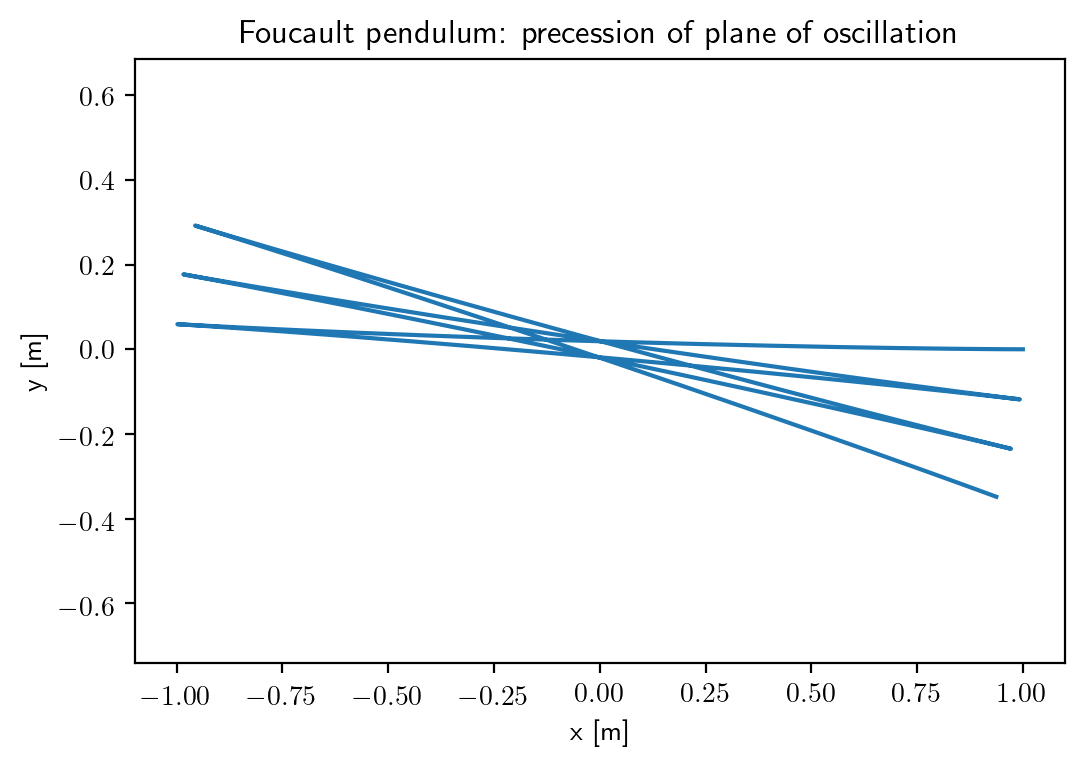

In [3]:
# Foucault pendulum analysis

# some constants
T_day = 24*3660 #s
D = 1 # m
g = 9.8 # m/s
L = 30 # m
lat = 49 # degree (Paris)
theta = 90-lat # degree

# angular frequency of oscillation
# NOTE: reduced by a factor of 200 so that one can easily see precession after a few oscillations
w = np.sqrt(g/L) * (1/200)
T = 2*np.pi/w # period
print('T =', T, 'sec')
Nt = 10000
t = np.linspace(0, 3*T, Nt)

# angular velocity
Omega = 2*np.pi/T_day
Omega_z = Omega*np.cos(np.deg2rad(theta))

# solution
x = D*( np.cos(Omega_z*t)*np.cos(w*t) + (Omega_z/w)*np.sin(Omega_z*t)*np.sin(w*t) )
y = D*(-np.sin(Omega_z*t)*np.cos(w*t) + (Omega_z/w)*np.cos(Omega_z*t)*np.sin(w*t) )

# plot trajectory in x-y plane
plt.figure()
plt.plot(x, y)
#plt.axis('equal')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.axis('equal')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Foucault pendulum: precession of plane of oscillation')

# 4. Hamiltonian mechanics (40)

### 1) Write down the Hamiltonian $H(p,q,t)$ for a simple system starting from a Lagrangian $L(q,\dot q,t)$.

General relationship:

$$
H(p,q,t) = \sum_i p_i \dot q_i - L(q,\dot q,t)
$$
where on the RHS all of the $\dot q_i=q_i(q,p,t)$.

1-d example:

$$
L(x,\dot x,t) = \frac{1}{2} m\dot x{}^2 - U(x)
$$

has

$$
p \equiv \frac{\partial L}{\partial \dot x} = m \dot x
$$

leading to 

$$
H(p,x,t) = \frac{p^2}{2m} + U(x)
$$

### 2) Write down Hamilton's equations for $p_i$ and $q_i$.

EOMs:

$$
\dot q_i = \frac{\partial H}{\partial p_i}\,,
\qquad
\dot p_i = -\frac{\partial H}{\partial q_i}\,,
\qquad
i=1,2,\cdots, n
$$

### 3) Explain the fundamental difference between Hamilton's equations and Lagrange's equations.

Hamilton's equations are $2n$ first-order differential equations for $q_i$, $p_i$, while Lagrange's equationis are $n$ second-order equations for the $q_i$.

### 4) Show the equivalence of Hamilton's equations and Lagrange's equation for simple systems.

For the above 1-d Lagrangian and Hamiltonian we have:

Lagrange's equation:

$$
\frac{d}{dt}\left(\frac{\partial L}{\partial \dot x}\right) = 
\frac{\partial L}{\partial x}
\quad
\Rightarrow
\quad
m\ddot x = -\frac{dU}{dx}
$$

Hamilton's equations:

$$
\dot x = \frac{\partial H}{\partial p} = \frac{p}{m}\,,
\qquad
\dot p = -\frac{\partial H}{\partial x} = -\frac{dU}{dx}
$$

Solving the first of Hamilton's equations for $p$, and then substituting this solution into the second equation yields:

$$
m\ddot x = -\frac{dU}{dx}
$$

which is the same as Lagrange's equation.

# 5. Central force motion (11, 13-15)

### 1) Write down an integral expression for $t$ for 1-d motion in a fixed external field $U(x)$.

Conservation of energy:

$$
\frac{1}{2} m \dot x^2 + U(x) = E = {\rm const}
$$

This is a separable differential equation with

$$
t = \int \frac{dx}{\sqrt{\frac{2}{m}(E-U(x))}} + {\rm const}
$$

### 2) Determine the allowed values of the energy and turning points for 1-d motion in a fixed external field.

Allowed values of the energy: 

$$
E \ge U_{\rm min}
$$

since kinetic energy is positive.

Turning points are solutions to the equation $E-U(x)=0$.

### 3) Transform the problem of two interacting particles into an effective one-body problem by working in the COM frame.

Lagrangian for two interacting particles:

$$
L = T - U = 
\frac{1}{2}m_1|\dot{\bf r}_1|^2 +
\frac{1}{2}m_2|\dot{\bf r}_2|^2 - U({\bf r}_1-{\bf r}_2)
$$

Total momentum in conserved since $L$ is unchanged by a spatial translation
${\bf r}_a\rightarrow {\bf r}_a + \delta{\bf x}$.
Thus, we can work in the COM frame where the COM is the origin of coordinates:

$$
m_1{\bf r}_1 + m_2{\bf r}_2 = 0
$$

In terms of the relative separation vector

$$
{\bf r}\equiv {\bf r}_1 - {\bf r_2}
$$

we have

$$
{\bf r}_1 = \frac{m_2}{m_1 + m_2}{\bf r}\,,
\qquad
{\bf r}_2 = -\frac{m_1}{m_1 + m_2}{\bf r}
$$

The kinetic energy becomes

$$
T = \frac{1}{2}m |\dot{\bf r}|^2
$$

where

$$
m \equiv \frac{m_1 m_2}{m_1+m_2}
$$

is the reduced mass.  Thus,

$$
L = \frac{1}{2}m|\dot{\bf r}|^2- U({\bf r})
$$

### 4) Show that both energy and angular momentum are conserved for a central potential.

For a central potential, $U$ depends only on the magnitude of the relative separation vector

$$
U = U(|{\bf r}_1-{\bf r}_2|) = U(r)
$$

Energy 

$$
E = \frac{\partial L}{\partial\dot{\bf r}}\cdot\dot{\bf r} - L
= \frac{1}{2}m|\dot{\bf r}|^2+ U(r)
$$

is conserved since the Lagrangian does not depend explicitly on time.

Angular momentum  

$$
{\bf M} = {\bf r}\times{\bf p} = m{\bf r}\times\dot{\bf r}
$$

is conserved since the Lagrangian is unchanged by a rotation 

$$
{\bf r}\rightarrow {\bf r} + \delta{\boldsymbol\phi}\times{\bf r}\,,
\qquad
\dot{\bf r}\rightarrow \dot{\bf r} + \delta{\boldsymbol\phi}\times\dot{\bf r}
$$

Since ${\bf M}$ is conserved, we can choose the orientation of our COM frame such that ${\bf M}$ points along the $z$-axis.  Then the motion is in the $zy$-plane and we can write the Lagrangian in terms of the coordinates $(r,\phi)$ and their time derivatives:

$$
L = \frac{1}{2}m\left(\dot r^2 + r^2\dot\phi^2\right) - U(r)
$$

Conservation of angular momentum then manifests itself as conservation of 

$$
p_\phi \equiv \frac{\partial L}{\partial\dot\phi}
$$

since $L$ does not depend explicitly on $\phi$.  Taking the derivative, we have

$$
p_\phi = mr^2\dot\phi \equiv \ell = {\rm const}
$$

or, equivalently,

$$
\dot\phi = \frac{\ell}{m r^2}
$$

**NOTE:** Landau and Lifshitz use $M$ instead of $\ell$ for the magnitude of the angular momentum.  We prefer $\ell$ since $M$ can be confused with the total mass $m_1+m_2$.

### 5) Write down an expression for the effective potential $U_{\rm eff}(r)$ in terms of $U(r)$ and $\ell$.

Energy:

$$
E = \frac{1}{2}m(\dot r^2 + r^2\dot\phi^2) + U(r)
= \frac{1}{2}m\dot r^2 + \frac{\ell^2}{2m r^2} + U(r)
= \frac{1}{2}m\dot r^2 + U_{\rm eff}(r)
$$

with

$$
U_{\rm eff}(r) = U(r) + \frac{\ell^2}{2mr^2}
$$

### 6) Plot the effective potential for some simple central force potentials.

The code below produces plots for the following potentials:

- Newtonian gravity: $U=-\alpha/r$

- 3d harmonic oscillator: $U=\alpha r^2$

- General relativity: $U=-\alpha/r - \beta/r^3$

Text(0.5, 1.0, 'Newtonian gravity')

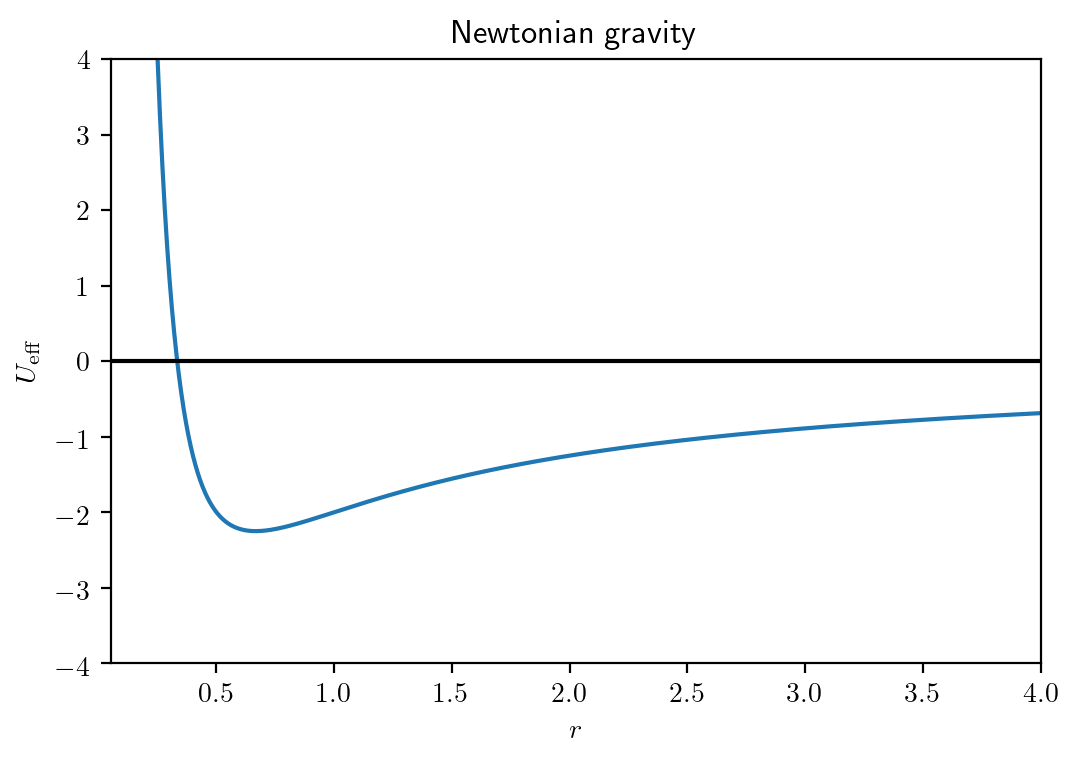

In [4]:
# Newtonian gravity (Kepler's problem) effective potential
eps = 1e-4
r = np.linspace(eps, 5, 1000)

U = -3./r
Ueff = U + 1./r**2

plt.figure()
plt.plot(r, Ueff)
plt.axhline(y=0, color='k')
plt.xlim((0.05, 4))
plt.ylim((-4,4))
plt.xlabel('$r$')
plt.ylabel('$U_{\mathrm{eff}}$')
plt.title('Newtonian gravity')
#plt.savefig('newtonian_gravity')

Text(0.5, 1.0, '3d harmonic oscillator')

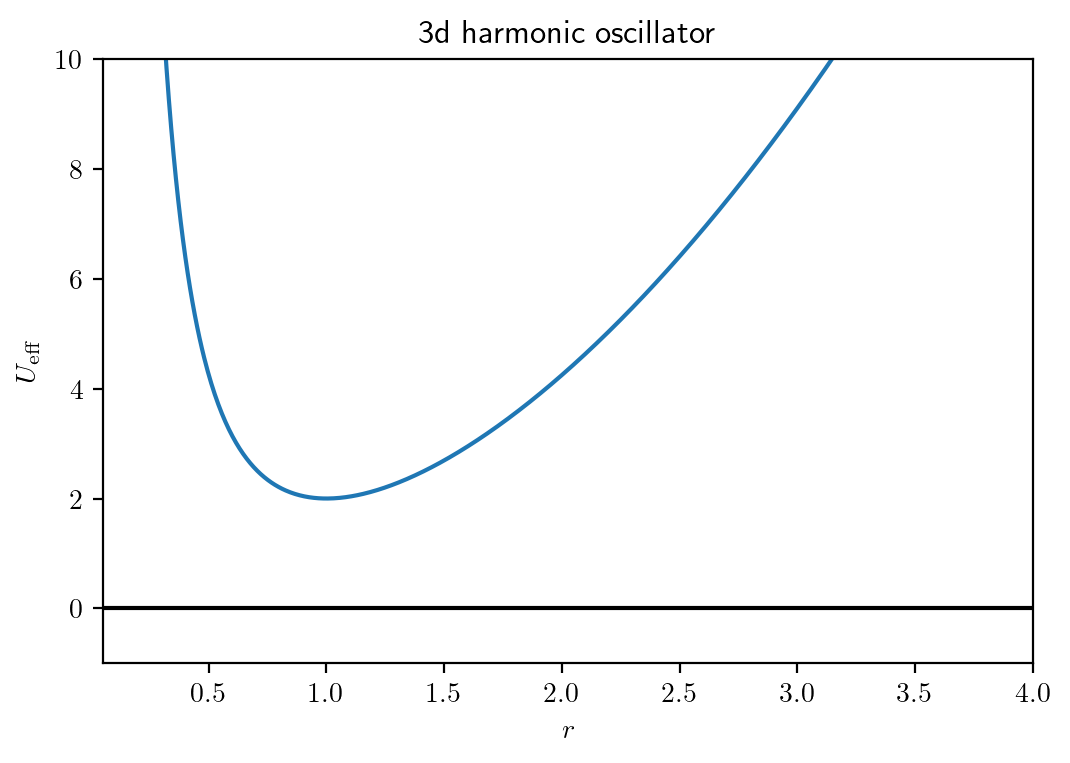

In [5]:
# 3d harmonic oscillator effective potential
eps = 1e-4
r = np.linspace(eps, 5, 1000)

U = r**2
Ueff = U + 1./r**2

plt.figure()
plt.plot(r, Ueff)
plt.axhline(y=0, color='k')
plt.xlim((0.05, 4))
plt.ylim((-1,10))
plt.xlabel('$r$')
plt.ylabel('$U_{\mathrm{eff}}$')
plt.title('3d harmonic oscillator')
#plt.savefig('3d_harmonic_oscillator')

Text(0.5, 1.0, 'General relativity')

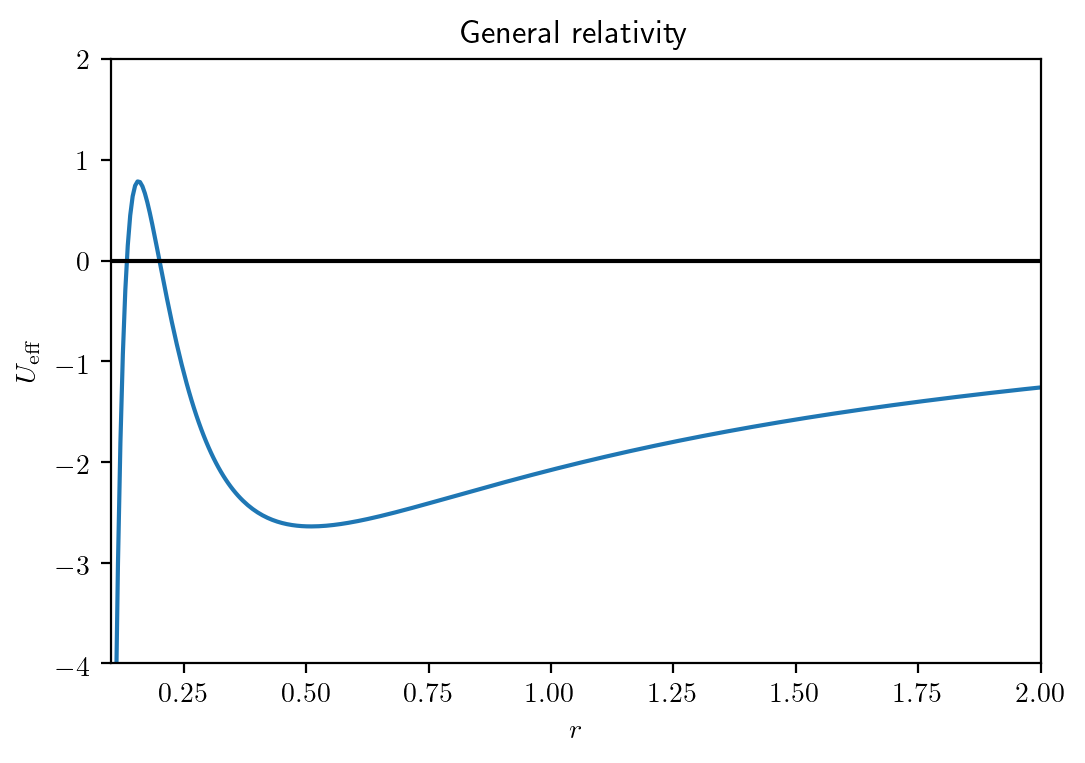

In [6]:
# GR effective potential
eps = 1e-4
r = np.linspace(eps, 5, 1000)

U1 = -3./r
U2 = -0.08/r**3
Ueff = U1 + U2 + 1./r**2

plt.figure()
plt.plot(r, Ueff)
plt.axhline(y=0, color='k')
plt.xlim((0.1, 2))
plt.ylim((-4,2))
plt.xlabel('$r$')
plt.ylabel('$U_{\mathrm{eff}}$')
plt.title('General relativity')
#plt.savefig('general_relativity')

### 7) From the graph of the effective potential, determine the different types of allowed motion.

Different values of the energy $E$ determine the different types of allowed motion.

Example: Newtonian gravity ($U= -\alpha/r$)

- $E<U_{\rm eff, min}$: not allowed
- $E=U_{\rm eff, min}$: stable circular orbit
- $U_{\rm eff, min} < E < 0$: bound (elliptical) orbit
- $E=0$: (parabolic) scattering orbit
- $E>0$: (hyperbolic) scattering orbit

For more general potentials, the bound and scattering orbits need not be conic sections.

### 8) Write down integral expressions for $t$ and $\phi$ in terms of $r$ for a general central potential.

Start with the energy equation written in the form:

$$
E 
= \frac{1}{2}m\dot r^2 + \frac{\ell^2}{2m r^2} + U(r)
$$

This is a separable equation for $r(t)$, which can be solved for $t$ as

$$
t = \int \frac{dr}{\sqrt{\frac{2}{m}(E-U(r)) - \frac{\ell^2}{m^2 r^2}}} + {\rm const}
$$

To obtain an integral expression for $\phi$ in terms of $r$, use the conservation of angular momentum equation

$$
\ell = mr^2\dot\phi 
$$

which implies

$$
dt = \frac{mr^2}{\ell}\,d\phi
$$

This leads to separable equation for $r(\phi)$, which can be solved for $\phi$ as

$$
\phi = \int \frac{\ell dr/r^2}{\sqrt{2m(E-U(r)) - \frac{\ell^2}{r^2}}} + {\rm const}
$$

### 9) Evaluate these two integrals for Kepler's problem, using appropriate trig substitutions

Kepler's problem: $U(r) = -\alpha/r$ where $\alpha=GMm>0$ with $M\equiv m_1+m_2$ denoting the total mass of the system.

For concreteness, we will consider here the case for bound orbits where $U_{\rm eff, min}\le E<0$.

(i) To solve the orbit equation for $r(\phi)$, first make the substitution $u=1/r$ in the $\phi$ integral:

$$
\phi = \int \frac{-\ell du}{\sqrt{2m(E+GMmu) - \ell^2 u^2}} + {\rm const}
$$

This integral now has the standard form

$$
I\equiv \int \frac{dx}{\sqrt{a + bx + cx^2}}
$$

which can either be looked up in a handbook of integrals or solved by completing the square of the expression inside the square root.  What type of substitution you make depends on the sign of value of $E$.  

Completing the square:

$$
2mE+ 2GMm^2\,u - \ell^2 u^2 
= -\ell^2\left[\left(u - \frac{GMm^2}{\ell^2}\right)^2 - \frac{G^2 M^2 m^4}{\ell^4} - \frac{2mE}{\ell^2}\right]
= \ell^2\left[B^2 - (u-A)^2\right]
$$

where 

$$
A\equiv \frac{GMm^2}{\ell^2}\,,
\qquad
B \equiv\sqrt{A^2 + \frac{2mE}{\ell^2}}
$$

Thus, 

$$
\phi = \int \frac{-du}{\sqrt{B^2 - (u-A)^2}} + {\rm const}
$$

This suggests the trig substitution

$$
u - A = B\sin\theta
$$

for which the integral becomes

$$
\phi = -\theta+{\rm const}
= -\sin^{-1}\left[\frac{u-A}{B}\right] + {\rm const}
= -\sin^{-1}\left[\frac{1/r-A}{B}\right] + {\rm const}
$$

It is convenient to choose the constant such that $\phi=0$ where $r=r_{\rm min}$ for the orbit.  Then

$$
{\rm const} = \sin^{-1}\left[\frac{1/r_{\rm min}-A}{B}\right]
$$

But since $r_{\rm min}$ is a turning point of the motion, it follows that 

$$
\frac{1}{r_{\rm min}}- A = B
\quad\Rightarrow\quad
{\rm const} = \sin^{-1}(1) = \pi/2
$$

Thus, making this substitution for the constant, and solving for $1/r$, we obtain

$$
\frac{1}{r} = A + B\cos\phi
$$

This has the form of an ellipse

$$
\boxed{
\frac{p}{r} = 1+e\cos\phi
}
$$

where $p$ is the semi-latus rectum of the ellipse and $e$ is the eccentricity (discussed in detailbelow).
Solving for $p$ and $e$:

$$
p = \frac{\ell^2}{GMm^2}\,,
\qquad
e = \sqrt{1 + \frac{2E\ell^2}{G^2 M^2 m^3}}
$$

Using the fact that the semi-major axis $a$ and semi-latus rectum $p$ for an ellipse are related by

$$
p = a(1-e^2)
$$

it follows from the above expressions that 

$$
a = -\frac{GMm}{2E}
\quad{\rm or}\quad
E = -\frac{GMm}{2a}
$$

***

(ii) To solve for the time dependence of the orbit, we rewrite the time integral as

$$
t = \sqrt{\frac{m}{2|E|}} \int \frac{ r dr}{\sqrt{-r^2 +\frac{GMm}{|E|}r- \frac{\ell^2}{2m|E|}}} + {\rm const}
$$

where we have simplified the square-root in the denominator by pulling out a factor of $\sqrt{\frac{2|E|}{m}}\frac{1}{r}$.

We then use the expressions 

$$
E=-\frac{GMm}{2a}\,,
\qquad
p = \frac{\ell^2}{GMm^2}
$$

to further simplify the integral:

$$
t = \sqrt{\frac{a}{GM}} \int \frac{ r dr}{\sqrt{-r^2 + 2ar - pa}} + {\rm const}
$$

Completing the square in the square root is now easy:

$$
-r^2 + 2ar + pa
= -\left[(r-a)^2 - a^2 +pa\right]
= -\left[(r-a)^2 - a^2 e^2\right]
$$

where we used $p = a(1-e^2)$ to get the last equality.  This suggests the trig substitution

$$
r-a = -ae \cos\xi
$$

where we have chosen to use a cosine function so that $\xi=0$ corresponds to $r_{\rm min}=a(1-e)$.
Making this substitution into the integral yields

$$
t 
= \sqrt{\frac{a}{GM}} \int d\xi\> a(1-e\cos\xi) + {\rm const}
= \sqrt{\frac{a^3}{GM}} (\xi - e\sin\xi)
$$

where we have set the constant to zero so that $t=0$ corresponds to $\xi=0$.

Thus, we have the parametric representation 

$$
\boxed{
r = a(1-e\cos\xi)\,,
\qquad
t = \sqrt{\frac{a^3}{GM}} (\xi - e\sin\xi)}
$$

We can also find an expression for $x$ and $y$ in terms of $\xi$:

We start with

$$
x = r\cos\phi
$$

Using 

$$
\frac{p}{r} = 1+ e\cos\phi
$$

it follows that

$$
p = r + ex
\quad{\rm or}\quad
x =\frac{1}{e}(p-r)
$$

Substituting for $r=a(1-e\cos\xi)$ then gives

$$
\boxed{
x = a(\cos\xi - e)}
$$

To find 

$$
y = r\sin\phi
$$

we write it instead as

$$
y = \sqrt{r^2-x^2}
$$

Substituting for $r$ and $x$ in terms of $\xi$ gives:

$$
\boxed{
y = a\sqrt{1-e^2}\sin\xi
}
$$

A complete orbit is traversed when $\xi$ goes from 0 to $2\pi$.

## Parametric representation of the time-evolution of an elliptical orbit

Text(0.5, 1.0, 'elliptical orbit')

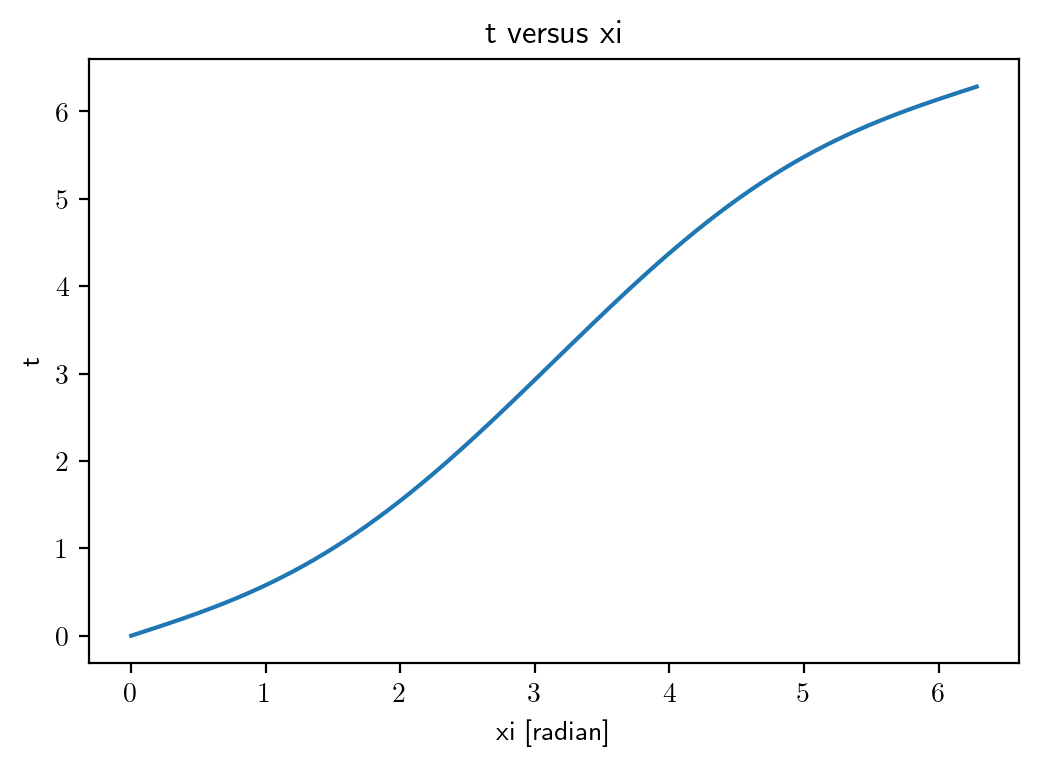

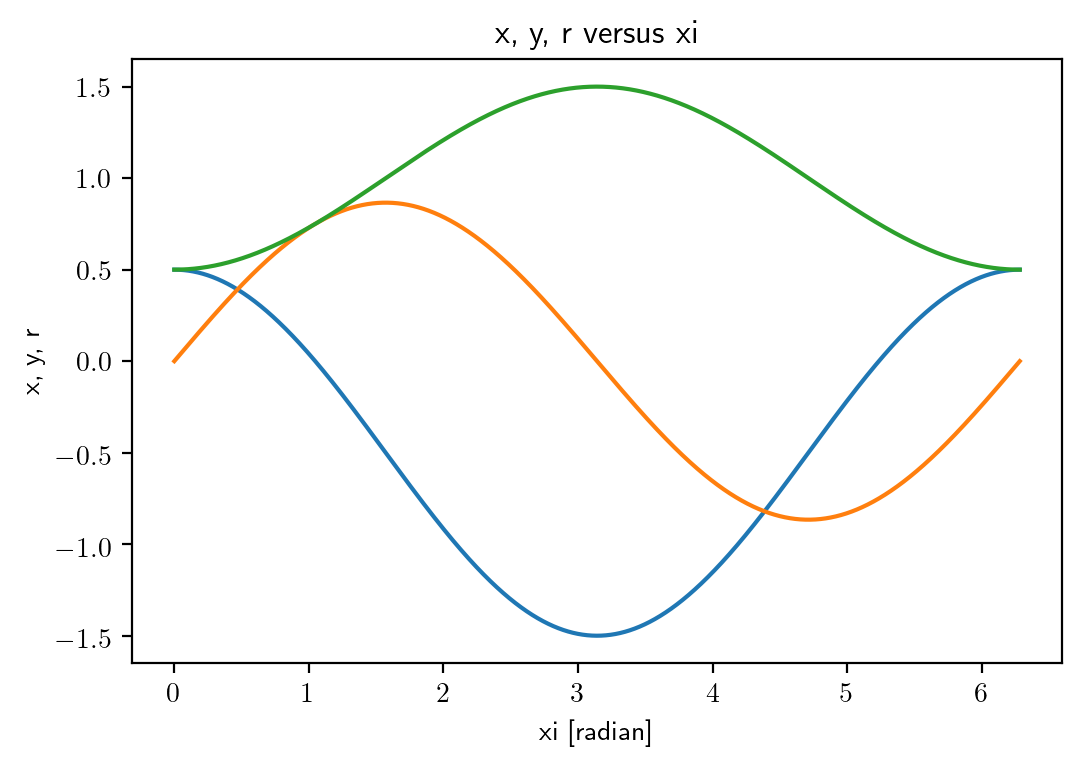

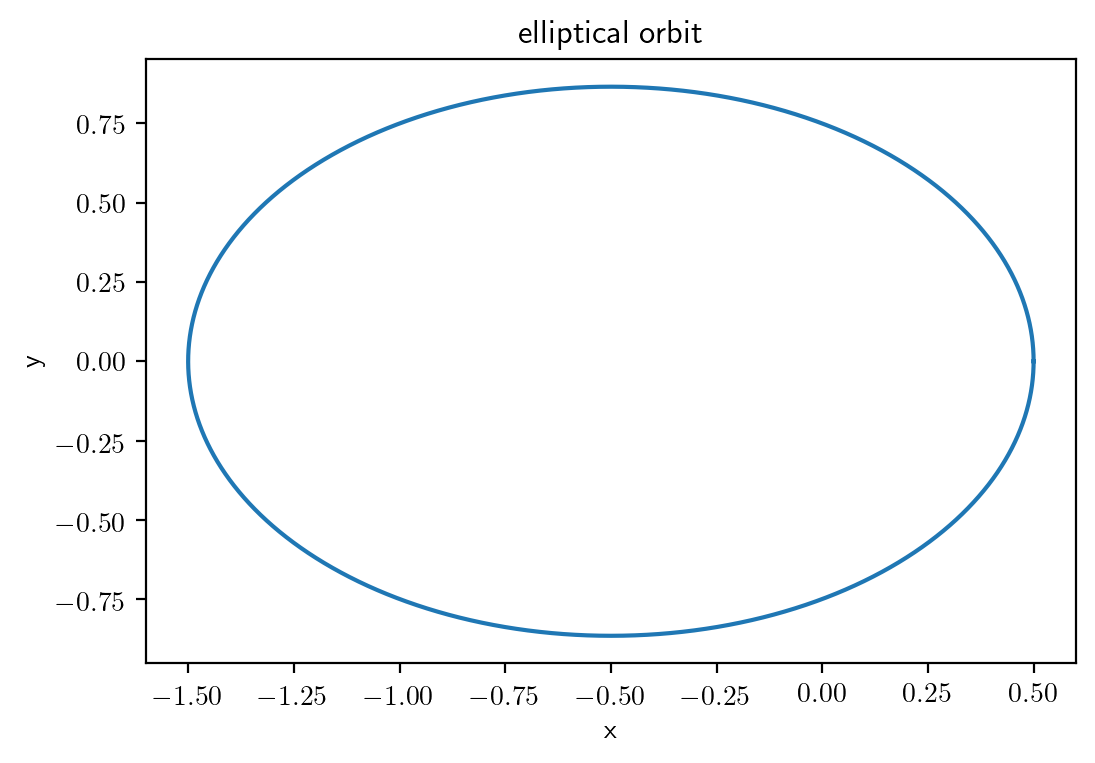

In [7]:
# parameters for ellipse
a = 1
e = 0.5
G = 1
M = 1

xi = np.linspace(0, 2*np.pi, 10000)
t = np.sqrt(a**3/(G*M)) * (xi - e*np.sin(xi))
r = a*(1-e*np.cos(xi))
x = a*(np.cos(xi)-e)
y = a*np.sqrt(1-e**2)*np.sin(xi)

plt.figure()
plt.plot(xi, t)
plt.xlabel('xi [radian]')
plt.ylabel('t')
plt.title('t versus xi')

plt.figure()
plt.plot(xi, x, xi, y, xi, r)
plt.xlabel('xi [radian]')
plt.ylabel('x, y, r')
plt.title('x, y, r versus xi')

plt.figure()
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('elliptical orbit')

### 10)  Derive the relationship between $E$, $\ell$, $a$, $b$, $e$, and $p$ for an ellipse.

Central force motion is described by two parameters, e.g., 

- $E$ and $\ell$ (the energy and angular momentum of the motion)
- $a$ and $b$ (the semi-major and semi-minor axes of an ellipse)
- $a$ and $e$ (the semi-major axis and eccentricity of the ellipse)
- $a$ and $p$ (the semi-major axis and semi-latus rectum of the ellipse)
- $r_p$ and $r_a$ (the minimum and maximum radii, perihelion and aphelion for motion around the Sun)
- or other combinations of the above

It is useful to be able to derive formula relating the different parameterizations.

Ellipse:
<img src="img/ellipse.pdf" width="500">

Using that fact that 

$$
d_1 + d_2 = 2a
$$

where $d_1$ and $d_2$ are the distances from the two focals points to a point on the ellipse, one can show that

$$
p = a(1-e^2)
$$

$$
b = a\sqrt{1-e^2}
$$

$$
e = \frac{\sqrt{a^2-b^2}}{a}
$$

We also have

$$
r_p = a(1-e)\,,
\qquad
r_a = a(1+e)
$$

We also showed earlier that

$$
\boxed{
E = -\frac{GMm}{2a}\,,
\qquad
\ell = \sqrt{GMm^2 p}}
$$

so that $E$ only depends on $a$ and $\ell$ only depends on $p$.

These last two results can also be derived from the conservation of energy equation: 

$$
E = \frac{1}{2}m\dot r^2 + \frac{\ell^2}{2mr^2} - \frac{GMm}{r}
$$

evaluated at $r_p=a(1-e)$ and $r_a=a(1+e)$, where $\dot r=0$.  One then has two equations which can be solved for $E$ and $\ell$ in terms of $a$ and $e$ (or $a$ and $p = a(1-e^2)$, which leads back to the boxed equations.

### 11) State the only two central potentials that have closed bound orbits.

- $U =-\alpha/r$ (Newtonian gravity) 
- $U = \alpha r^2$ (3d harmonic oscillator)

### 12) State and derive Kepler's three laws of planetary motion.

Kepler's laws:

I. Planets go around the Sun in elliptical orbits with the Sun at one focus

II. A line connecting the planet to the Sun sweeps out equal areas in equal times

III. $P^2/a^3 = {\rm const}$ for all planets, where $P$ is the orbital period of a planet and $a$ is the semi-major axis of its elliptical orbit around the Sun

NOTE: Kepler's laws need to be adjusted slightly given the finite mass of the Sun. Since the Sun has finite mass, the focal point of the elliptical orbit is actually at the COM of the planet and the Sun. Also, the constant in Kepler's 3rd law is not simply related to the mass of the Sun but to the total mass of the Earth-planet system.

Proof:

I. We already proved this law by integrating the orbit equation to find $r$ as a function of $\phi$.

II. Equal areas in equal times means that $dA/dt$ should be constant.  From the following figure

<img src="img/keplers_2nd_law.pdf" width="400">

we see that the differential area swept out in time interval $dt$ is approximately a triangle, so

$$
dA = \frac{1}{2}{\rm base}\cdot{\rm height} = \frac{1}{2}r^2 d\phi
$$

Dividing both sides by $dt$ and using $\ell = mr^2\dot\phi$, it follows that

$$
\frac{dA}{dt} = \frac{1}{2} r^2\dot\phi = \frac{\ell}{2m} = {\rm const}
$$

Note that Kepler's 2nd law is a consequence of conservation of angular momentum, and is therefore valid for any central force.

III. For Kepler's 3rd law, we need to calculate the period of a planet's orbit around the Sun. This can be obtained by integrating Kepler's 2nd law for one complete elliptical orbit:

$$
P = \int dt = \int \frac{2m}{\ell}\,dA = \frac{2m}{\ell}\pi ab
$$

where we used $A=\pi ab$ for the area of an ellipse.  
Then substituting for 

$$
b= a\sqrt{1-e^2}\,,
\qquad
\ell = \sqrt{GMm^2p}\,,
\qquad 
p = a(1-e^2)
$$

we get

$$
P = \frac{2m}{\sqrt{GMm^2p}}\pi a^2\sqrt{1-e^2}
=2\pi \sqrt{\frac{a^3}{GM}}
$$

so

$$
\frac{P^2}{a^3} = \frac{4\pi^2}{GM}
$$

which is the desired result.  In terms of the angular frequency $\omega = 2\pi/P$, we have

$$
\boxed{
\omega^2 a^3 = GM
}
$$

### 13) Explain the difference in $E$ and $e$ for elliptical, parabolic, and hyperbolic motion.

- Elliptical orbits: $U_{\rm eff, min}\le E< 0$, $0\le e<1$

- Parabolic (scattering) motion: $E=0$, $e=1$

- Hyperbolic (scattering) motion: $E>0$, $e>1$

# 6. Collisions and scattering (16-20)

### 1) Draw diagrams relating velocities in the lab and COM frames for the disintegration of a single particle.

Notation: 

- ${\bf v}_0$ is the velocity of one of the particles produced by the disintegration as seen in the COM frame
- ${\bf v}$ is its velocity with respect to the lab frame
- ${\bf V}$ is the velocity of the COM of the system (i.e., the velocity of the particle in the lab frame *before* disintegration)
- $\theta_0$ is the angle that ${\bf v}_0$ makes wrt ${\bf V}$
- $\theta$ is the angle that ${\bf v}$ makes wrt ${\bf V}$

Case $V<v_0$:
<img src="img/disintegration_V_lt_v0.pdf" width="400"> 

Case $V>v_0$:
<img src="img/disintegration_V_gt_v0.pdf" width="500">

For the case $V>v_0$, the particles produced by the disintegration are emitted only in the forward direction as seen in the lab frame, $\theta < \pi/2$.  The maximum angle $\theta_{\rm max}$ is 

$$
\sin\theta_{\rm max} = \frac{v_0}{V}
$$

### 2) Draw diagrams relating the momenta in the lab and COM frames for an elastic collision of two particles ($m_2$ initially at rest in the lab frame).

Notation:

- ${\bf p}_1'$, ${\bf p}_2'$ are the momenta of the two particles as seen in the lab frame after the collision
- ${\bf n}_0$ is the direction of particle 1 as seen in the COM frame after the collision (subscript '0' denotes quantities wrt COM frame)
- $v = |{\bf v}|$ is the magnitude of the relative velocity vector ${\bf v}\equiv {\bf v}_1-{\bf v}_2$ before the collision (note: ${\bf v}={\bf v}_0$
- $m$ is the reduced mass of the system, $m\equiv m_1m_2/(m_1+m_2)$
- ${\bf V}$ is the velocity of the COM of the system ${\bf V} = m_1 {\bf v}_1/(m_1+m_2)$
- $\chi$ is the angle that particle 1 makes wrt ${\bf V}$ as seen in the COM frame
- $\theta_1$ is the angle that particle 1 makes wrt ${\bf V}$ as seen in the lab frame
- $\theta_2$ is the angle that particle 2 makes wrt ${\bf V}$ as seen in the lab frame

Case $m_1<m_2, v_2=0$:
<img src="img/collision_m1_lt_m2.pdf" width="400">

Case $m_1>m_2, v_2=0$:
<img src="img/collision_m1_gt_m2.pdf" width="500">

Conservation of momentum (wrt lab frame):

$$
(m_1+m_2){\bf V} = {\bf p}_1' + {\bf p}_2'
$$

In the COM frame, the total momentum is zero, since the momenta of the two particles are equal and opposite.  After the collision:

$$
{\bf p}_{10}' = mv{\bf n}_0 = -{\bf p}_{20}'
$$

Elastic collision:  The magnitude $v$ of the relative velocity vector ${\bf v}$ is the same before and after the collision.

For the case where $m_2$ is initially at rest (i.e., ${\bf v}_2=0$) we have ${\bf v} = {\bf v_1}$.  Thus, 

$$
m_2 V = m_2 \frac{m_1 v_1}{m_1+m_2} = m v_1 = m v
$$

so $B$ lies on the boundary of the circle.

For the case $m_1>m_2$, we can only have forward scattering of the particles in the lab frame, $\theta_1, \theta_2 < \pi/2$.

### 3) Explain what information can and cannot be obtained for an elastic collison of two particles, using just conservation of momentum and conservation of kinetic energy.

An elastic collision of two particles is mostly simply analyzed in the COM frame.  In this frame, the momenta of the two particles both before and after the collision are equal in magnitude and opposite in direction.  Conservation of kinetic energy implies that the magnitude of the relative velocity vector ${\bf v}$ is unchanged by the collision since

$$
T =\frac{1}{2} m_1 |{\bf v}_{10}|^2 + \frac{1}{2} m_2 |{\bf v}_{20}|^2
= \frac{1}{2} m |{\bf v}_0|^2
$$

where

$$
m\equiv \frac{m_1 m_2}{m_1+m_2}\,,
\qquad
{\bf v}_0 \equiv {\bf v}_{10} - {\bf v}_{20} = {\bf v}_1-{\bf v}_2 \equiv {\bf v}
$$

Hence an elastic collision can only change the direction of the relative velocity vector.  This direction is cannot be determined.

### 4) Derive formulas relating the scattering angles $\chi$, $\theta_1$, $\theta_2$ in the COM and lab frames.

From either of the last two figures, one sees that

$$
\chi + 2\theta_2 = \pi 
\quad({\rm from\ equilateral\ triangle\ }OBC)
$$

so

$$
\boxed{
\theta_2 =\frac{1}{2}(\pi - \chi)}
$$

Also

$$
\tan\theta_1 = \frac{mv\sin\chi}{m_1V + mv\cos\chi}
$$

Using

$$
m \equiv \frac{m_1 m_2}{m_1 + m_2}\,,
\qquad
v = v_1\,,
\qquad
V = \frac{m_1 v_1}{m_1 + m_2}
$$

where the last two results hold since $v_2=0$, it follows that

$$
\boxed{
\tan\theta_1
= \frac{m_2 \sin\chi}{m_1 + m_2\cos\chi}
\qquad
{\rm or}
\qquad
\cos\theta_1 =\frac{m_1 + m_2\cos\chi}{\sqrt{m_1^2 + m_2^2 + 2 m_1 m_2\cos\chi}}
}
$$

### 5) Draw diagrams showing how the scattering angle $\chi$ is related to the angle of closest approach $\phi_0$.

Repulsive scattering:
<img src="img/scattering_repulsive.pdf" width="400">



Attractive scattering:
<img src="img/scattering_attractive.pdf" width="400">

For repulsive scattering

$$
\chi + 2\phi_0 = \pi
$$

For attractive scattering

$$
2\phi_0-\chi = \pi
$$

Both of these relations can be captured by

$$
\chi = |\pi - 2\phi_0|
$$

### 6) Relate the impact parameter $\rho$ and initial velocity $v_\infty$ to the energy $E$ and angular momentum $\ell$.

Relation:

$$
E = \frac{1}{2}m v_\infty^2\,,
\qquad
\ell = m\rho v_\infty
$$

where $m$ is the reduced mass of the system $m\equiv m_1 m_2/(m_1+m_2)$.

### 7) Derive an integral expression for $\phi_0$ and solve it for simple potentials---e.g., $U(r) = \alpha/r$ for Rutherford scattering.

Start with the central force differential equation for $\phi$:

$$
d\phi = \frac{\ell dr/r^2}{\sqrt{2m(E-U(r)) - \frac{\ell^2}{r^2}}}
$$

Integrate the LHS from 0 to $\phi_0$ and the RHS from $r_{\rm min}$ to $\infty$:

$$
\phi_0 = \int_{r_{\rm min}}^\infty \frac{\ell dr/r^2}{\sqrt{2m(E-U(r)) - \frac{\ell^2}{r^2}}}
$$

If we substitute for $E$ and $\ell$ using

$$
E = \frac{1}{2}mv_\infty^2\,,
\qquad
\ell = m\rho v_{\rm \infty}
$$

we obtain

$$\boxed{
\phi_0 = \int_{r_{\rm min}}^\infty \frac{\rho dr/r^2}{\sqrt{1 - \frac{2U(r)}{mv_\infty^2} - \frac{\rho^2}{r^2}}}
}
$$

***
Rutherford scattering:

Take $U(r) = \alpha/r$.  Note that $\alpha>0$ corresponds to repulsive scattering and $\alpha<0$ to attractive scattering.

Similar to what we did when solving for the orbit for Kepler's problem, make the substitution $u=\rho/r$.  Then $du = -\rho dr/r^2$ and 

$$
\phi_0 = \int_0^{\rho/r_{\rm min}} \frac{du}{\sqrt{1 - \frac{2\alpha}{\rho mv_\infty^2}u - u^2}}
$$

Again we can complete the square for the quadratic in the square root leading to a trig substitution of the form

$$
u +\frac{\alpha}{\rho mv_\infty^2} = A\sin\theta\,,
\qquad
A = \sqrt{1 + \left(\frac{\alpha}{\rho mv_\infty^2}\right)^2}
$$

which allows us to evaluate the integral:

$$\boxed{
\phi_0 = \cos^{-1}\frac{\alpha/\rho m v_\infty^2}{\sqrt{1 + \left(\frac{\alpha}{\rho mv_\infty^2}\right)^2}}
}
$$

For calculating the differential cross section (see below), it is useful to find an explicit relationship between the impact parameter $\rho$ and scattering angle $\chi$.  Using the above expression for $\phi_0$, we get

$$
\rho = \frac{|\alpha|}{mv_\infty^2}\tan\phi_0
$$

Then using

$$
\phi_0 = \frac{\pi}{2} \mp \frac{\chi}{2}
$$

we have
$$\boxed{
\rho = \frac{|\alpha|}{mv_\infty^2}\cot\left(\frac{\chi}{2}\right)
}$$

### 8) Write down expressions for ${\rm d}\sigma$ in terms of ${\rm d}\rho$, ${\rm d}\chi$, ${\rm d}\theta_1$, ${\rm d}\theta_2$, or ${\rm d}\Omega$, ${\rm d}\Omega_1$, ${\rm d}\Omega_2$.

Differential cross section:  
$$
d\sigma = 2\pi \rho d\rho
\quad({\rm differential\ area\ of\ annular\ region})
$$

<img src="img/differential_cross_section.pdf" width=600>

In the COM frame:

$$
d\Omega = 2\pi \sin\chi d\chi = 2\pi d(\cos\chi)
\quad({\rm solid\ angle})
$$

$$
\frac{d\sigma}{d\Omega}
= \frac{\rho}{\sin\chi}\left|\frac{d\rho}{d\chi}\right|
= \rho \left|\frac{d\rho}{d(\cos\chi)}\right|
\quad({\rm absolute\ value\ to\ keep\ things\ positive})
$$

In the lab frame (for particle 1):

$$
d\Omega_1 = 2\pi \sin\theta_1 d\theta_1 = 2\pi d(\cos\theta_1)
$$

$$
\frac{d\sigma_1}{d\Omega_1}
= \frac{\rho}{\sin\theta_1}\left|\frac{d\rho}{d\theta_1}\right|
= \rho \left|\frac{d\rho}{d(\cos\theta_1)}\right|
= \frac{d\sigma}{d\Omega}\,\left|
\frac{d(\cos\chi)}{d(\cos\theta_1)}\right|
$$

which implies

$$
d\sigma_1 = \frac{d\sigma}{d\Omega}\,\left|
\frac{d(\cos\chi)}{d(\cos\theta_1)}\right|\,d\Omega_1
\quad{\rm where}\quad
d\Omega_1 = 2\pi \sin\theta_1\,d\theta_1
$$

The same applies for $d\theta_2$, $d\Omega_2$.

Thus we need to be able to calculate quantities like ${d(\cos\chi)}/{d(\cos\theta_1)}$ and ${d(\cos\chi)}/{d(\cos\theta_2)}$.

***

Recall:

$$
\cos\theta_1 =\frac{m_1 + m_2\cos\chi}{\sqrt{m_1^2 + m_2^2 + 2 m_1 m_2\cos\chi}}\,,
\qquad
\theta_2 =\frac{1}{2}(\pi - \chi)
$$

relate the scattering angles in the lab and COM frames.

We first invert these equations for $\chi$ in terms of $\theta_1$ and $\theta_2$:

$$
\cos\chi = -\left(\frac{m_1}{m_2}\right)\sin^2\theta_1 \pm \cos\theta_1\sqrt{1-\left(\frac{m_1}{m_2}\right)^2\sin^2\theta_1}
$$

and

$$
\cos\chi = \cos(\pi - 2\theta_2) = -\cos(2\theta_2)
$$

for which

$$
d(\cos\chi) = d(\cos\theta)\left[
2\left(\frac{m_1}{m_2}\right)\cos\theta_1 \pm
\frac{\left(1+\left(\frac{m_1}{m_2}\right)^2\cos^2(2\theta_1)\right)}
{\sqrt{1-\left(\frac{m_1}{m_2}\right)^2\sin^2\theta_1}}\right]
$$

and 

$$
d(\cos\chi) = -d(\cos(2\theta_2)) = -4\cos\theta_2\,d(\cos\theta_2)
$$


### 9) Explain how one can obtain an expression for small-angle scattering starting from the integral equation for $\phi_0$.

Recall:

$$
\phi_0 = \int_{r_{\rm min}}^\infty \frac{\rho dr/r^2}{\sqrt{1 - \frac{2U(r)}{mv_\infty^2} - \frac{\rho^2}{r^2}}}
$$

Small-angle scattering corresponds to 

$$
\epsilon \equiv -\frac{2 U(r)}{mv_\infty^2}\ll 1
$$

We expect $\phi_0$ to deviate slightly from the $U(r)\rightarrow 0$ value of $\phi_0=\pi/2$.

Expand the factor of 1/sqrt in the integrand:

$$
\frac{1}{\sqrt{1-{\rho^2}/{r^2} + \epsilon}}
=\frac{1}{\sqrt{\left(1-{\rho^2}/{r^2}\right)
\left[1 + \frac{\epsilon}{1-\rho^2/r^2}\right]}}
\approx
\frac{1}{\sqrt{1-{\rho^2}/{r^2}}} \left[1 - \frac{1}{2}\frac{\epsilon}{1-\rho^2/r^2}\right]
=\frac{1}{\sqrt{1-{\rho^2}/{r^2}}} - \frac{1}{2}\frac{\epsilon}{\left(1-\rho^2/r^2\right)^{3/2}}
$$

The first term when multiplied by $\rho dr/r^2$ and integrated from $r_0$ to $\infty$ gives $\pi/2$.

The second term when multiplied by $\rho dr/r^2$ and integrated from $r_0$ to $\infty$ gives

$$
-\frac{1}{2}\int_{r_0}^\infty \frac{\epsilon\rho dr/r^2}{\left(1-\rho^2/r^2\right)^{3/2}}
= \frac{1}{mv_\infty^2}\int_\rho^\infty \frac{U(r)\rho dr/r^2}{\left(1-\rho^2/r^2\right)^{3/2}}
$$

where we have substituted for $\epsilon$ and replaced the limit $r_0$ by $\rho$ to get the last equality.

Thus,

$$
\phi_0 
\approx \frac{\pi}{2}+\frac{1}{mv_\infty^2}\int_\rho^\infty \frac{U(r)\rho dr/r^2}{\left(1-\rho^2/r^2\right)^{3/2}}
= \frac{\pi}{2}+\frac{1}{mv_\infty^2}\frac{\partial}{\partial\rho}
\left[\int_\rho^\infty \frac{U(r)dr}{\sqrt{1-\rho^2/r^2}}\right]
$$

Now the integral

$$
I\equiv \int_\rho^\infty \frac{U(r)dr}{\sqrt{1-\rho^2/r^2}}
$$

can be integrated by parts setting

$$ 
u=U(r)\,,
\qquad
dv = \frac{dr}{\sqrt{1-\rho^2/r^2}} = \frac{r\,dr}{\sqrt{r^2-\rho^2}} 
$$

for which

$$
du = \frac{dU}{dr}\,dr\,,
\qquad
v = \sqrt{r^2-\rho^2}
$$

where the last result was obtained making the substitution $x=r^2-\rho^2$ to do the integral for $v$.

Thus,

$$
I = U(r)\sqrt{r^2-\rho^2}\,\bigg|_{\rho}^\infty - \int_\rho^\infty dr\,\frac{dU}{dr}\sqrt{r^2-\rho^2}
= - \int_\rho^\infty dr\,\frac{dU}{dr}\sqrt{r^2-\rho^2}
$$

where the first term vanishes assuming $U(r)\rightarrow 0$ faster than $1/r$ as $r\rightarrow\infty$.

Substituting $I$ back into the expression for $\phi_0$ gives

$$
\phi_0 \approx \frac{\pi}{2} 
-\frac{1}{mv_\infty^2}\frac{\partial}{\partial\rho}\left[\int_\rho^\infty dr\,\frac{dU}{dr}\sqrt{r^2-\rho^2}\right]
= \frac{\pi}{2} + \frac{\rho}{m v_\infty^2}\int_\rho^\infty dr\,\frac{dU}{dr}\frac{1}{\sqrt{r^2-\rho^2}}
$$

which is the desired result.

# 7. Small oscillations (21-23)

### 1) Explain what stable equilibrium means in terms of the potential energy $U(q)$.

Stable equilibrium means there exists a local minimum at some $q_0$:

$$
\frac{dU}{dq}\bigg|_{q_0}=0\,,
\qquad
\frac{d^2 U}{dq^2}\bigg|_{q_0}>0
$$

### 2) Calculate the frequency for small oscillations about a position of stable equilibrium.

Lagrangian:

$$
L=\frac{1}{2}a(q)\dot q^2 - U(q)
$$

Let $q_0$ be a position of stable equilibrium, and define 

$$
x\equiv q - q_0
$$

which implies $\dot x = \dot q$.

Then for small deviations around $q_0$, 

$$
U(q) = U(q_0) + \frac{dU}{dq}\bigg|_{q_0}(q-q_0) + \frac{1}{2}\frac{d^2 U}{dq^2}\bigg|_{q_0}(q-q_0)^2+\dots
\approx U_0 + \frac{1}{2} k x^2
$$

where

$$
U_0 \equiv U(q_0)\,,
\qquad
k\equiv \frac{d^2 U}{dq^2}\bigg|_{q_0}
$$

So for small deviations around $q_0$

$$
L = \frac{1}{2} m\dot x^2 - \frac{1}{2}kx^2 
$$

where $m\equiv a(q_0)$ and we have dropped the constant $U_0$ from the Lagrangian.

Lagrange's equation:

$$
\frac{d}{dt}\left(\frac{\partial L}{\partial\dot x}\right) = \frac{\partial L}{\partial x}
$$

gives

$$
m\ddot x = -kx
$$

which has general solution

$$
x = c_1\cos(\omega t) + c_2\sin(\omega t)\,,
\qquad
\omega\equiv \sqrt{\frac{k}{m}}
$$


### 3) Solve the equations of motion for both free and forced oscillation in one dimension, noting the difference between the general solution of the homogeneous equation and a particular integral of the inhomogeneous equation.

From the previous part we saw that the EOMs for free oscillations is

$$
m\ddot x = -kx
$$

which has general solution

$$
x = c_1\cos(\omega t) + c_2\sin(\omega t)\,,
\qquad
\omega\equiv \sqrt{\frac{k}{m}}
$$

This solution can also be written as

$$
x = a\cos(\omega t +\alpha)
$$

where

$$
a = \sqrt{c_1^2 +c_2^2}\,,
\qquad
\tan\alpha = -c_2/c_1
$$

or as the real part of a complex solution

$$
x = {\rm re}\left[A e^{i\omega t}\right]\,,
\qquad
A = ae^{i\alpha}
$$

***

Forced oscillations:

$$
m\ddot x = -kx + F(t)
$$

or, equivalently,

$$
\ddot x + \omega^2 x = \frac{F(t)}{m}
$$

where $\omega \equiv \sqrt{k/m}$.

This 2nd-order ODE for $x(t)$ can be converted to a 1st-order ODE by defining

$$
\xi \equiv \dot x + i\omega x
$$

for which

$$
\dot\xi = \ddot x + i\omega \dot x
$$

and

$$
\dot\xi - i\omega\xi = \frac{F(t)}{m}
$$

This is a linear 1st-order ODE for $\xi(t)$ similar to

$$
y'(x) + P(x)y(x) = Q(x)
$$

which we can rewrite in differential notation as

$$
dy + \left[P(x)y - Q(x)\right]dx = 0
$$

Although the LHS is not an exact differential, it can be made so by multiplying by an integrating factor 
$\mu(x)$ for which

$$
\mu(x) dy + \mu(x)\left[P(x)y - Q(x)\right]dx = dU
$$

for some function $U(x,y)$.
The integrating factor $\mu(x)$ can be found by solving

$$
\frac{d\mu}{dx} 
= \frac{\partial}{\partial y}\left(\mu(x)\left[P(x)y - Q(x)\right]\right)
= \mu(x) P(x)
$$

leading to

$$
\mu(x) = e^{I(x)}\,,
\qquad
I(x) \equiv {\int P(x) dx}
$$

To find $U$ we solve

$$
\frac{\partial U}{\partial x} = \mu(x)\left[P(x)y - Q(x)\right]\,,
\qquad
\frac{\partial U}{\partial y} = \mu(x)\,,
$$

The solution to the 2nd equation is

$$
U(x,y) = \mu(x) y + g(x)
$$

for some function $g(x)$.  
The function $g(x)$ is determined by substituting this solution for $U$ back into the 1st equation:

$$
\mu'(x) y + g'(x) = \mu(x)\left[P(x)y - Q(x)\right]
$$

Substituting our previous solution for $\mu(x)$ leads to 

$$
g'(x) = -\mu(x) Q(x)
$$

which implies

$$
g(x) = -\int dx\>\mu(x) Q(x) = 
-\int dx\> e^{I(x)} Q(x)
$$

Thus,

$$
U(x,y) = e^{I(x)}y - \int dx\> e^{I(x)} Q(x)
$$

The solution to the original 1st-order ODE for $y$ is then given by $U(x,y)={\rm const}$.  So

$$
y = e^{-I(x)}\left[\int dx\> e^{I(x)} Q(x) + {\rm const}\right]\,,
\qquad
I(x)\equiv \int P(x) dx
$$

Returning to the differential equation for $\xi(t)$, we wee that $-i\omega$ plays the role of $P(x)$ and $F(t)/m$ plays the role of $Q(x)$.

Thus, the solution for $\xi(t)$ is given by

$$
\xi = e^{i\omega t}\left[\int dt\> e^{-i\omega t} F(t)/m + {\rm const}\right]
$$

By choosing the limits on the integral to run from $0$ to $t$, the constant becomes $\xi(0)\equiv\xi_0$.
Thus,

$$
\boxed{
\xi = e^{i\omega t}\left[\int_0^t dt\> e^{-i\omega t} F(t)/m + \xi_0\right]}
$$

The first term on the RHS is a particular solution to the differential equation for $\xi(t)$; the second term is the general solution to the homogeneous equation and involves the complex integration constant $\xi_0$.

To return to $x(t)$, we recall the definition

$$
\xi \equiv  \dot x + i\omega x
$$

implies

$$\boxed{
\dot x = {\rm re}[\xi]\,,
\qquad
x = {\rm im}[\xi/\omega]
}$$


### 4) Calculate the eigenfrequencies / eigenvectors for small oscillations of systems with more than one DOF.

The Lagrangian

$$
L = \frac{1}{2}\sum_{ik} a(q) \dot q_i\dot q_k - U(q)
$$

becomes

$$
L = \frac{1}{2}\sum_{i,k} m_{ik} \dot x_i \dot x_k - \frac{1}{2} \sum_{i,k} k_{ik} x_i x_k
$$

for small oscillations around $q_{i0}$, where

$$
x_i \equiv q_i - q_{i0}\,,
\qquad
m_{ik} \equiv a_{ik}(q_0)\,,
\qquad
k_{ik}\equiv \frac{\partial^2 U}{\partial q_i\partial q_k}\bigg|_{q_0}
$$

Lagrange's equations

$$
\frac{d}{dt}\left(\frac{\partial L}{\partial \dot x_i}\right) 
= \frac{\partial L}{\partial x_i}\,,
\qquad
i=1,2,\cdots, n
$$

imply

$$
\sum_k m_{ik} \ddot x_k = -\sum_k k_{ik}x_k\,,
\qquad
i=1,2,\cdots, n
$$

We guess a sinusoidal aolution of the form

$$
x_i = A_i e^{i\omega t}\,,
\qquad
i=1,2,\cdots, n
$$

which converts the above EOMs to 

$$
\sum_k -\omega^2 m_{ik}A_k \ddot x_k = -\sum_k k_{ik}A_k\,,
\qquad
i=1,2,\cdots, n
$$

or, equivalently,

$$
\sum_k (k_{ik}-\omega^2 m_{ik})A_k = 0\,,
\qquad
i=1,2,\cdots, n
$$

These equations have a non-trivial solution for the $A_i$ only if the matrix
$(k_{ik}-\omega^2 m_{ik})$ is not invertible.

Thus, we must have

$$\boxed{
|k_{ik}-\omega^2 m_{ik}|=0
\qquad
({\rm eigenvalue\ equation})}
$$

where $|\ |$ means take the determinant.
This is an $n$th-order polynomial equation for the normal mode frequencies $\omega_\alpha^2$.  

The normal mode oscillations are the corresponding eigenvectors $A_{k\alpha}$, which are solutions to the matrix equation

$$\boxed{
\sum_k (k_{ik}-\omega^2_\alpha m_{ik})A_{k\alpha} = 0\,,
\qquad
i=1,2,\cdots, n
\qquad
({\rm eigenvector\ equation})}
$$



# 8. Rigid body motion (31-36, 38)

### 1) Draw a diagram showing the body frame and fixed inertial reference frame.

<img src="img/rigid_body.pdf" width=500>

Notation:

- $K_0$: inertial frame 
- $K$: body frame (non-inertial)
- $m$: point mass $m$ fixed in the body frame
- ${\bf r}_0$, ${\bf r}$: position vectors of $m$ wrt to $K_0$, $K$
- ${\bf R}$: position vector of the origin $O$ of the body frame (usually taken at the COM of the body)

### 2) Show that the angular velocity vector is unchanged under a shift of the origin of the body frame.

Consider a shift of origin of the body frame from ${\bf R}$ to ${\bf R}'\equiv {\bf R} + {\bf a}$.  Let ${\bf r}$ and ${\bf r}'$ denote the position vectors of a mass point fixed in the rigid body wrt these two origins.  Then

$$
{\bf r} = {\bf r}' + {\bf a}
$$

Wrt to the inertial frame:

$$
{\bf v}_0 
= {\bf V} + {\bf\Omega}\times {\bf r}
$$

where ${\bf V} \equiv \dot{\bf R}$.  Expanding the RHS of the above expression, we have

$$
{\bf v}_0 
= {\bf V} + {\bf\Omega}\times ({\bf r}' + {\bf a})
= {\bf V} + {\bf\Omega}\times{\bf r}' + {\bf\Omega}\times{\bf a}
= {\bf V}' + {\bf\Omega}'\times {\bf r}'
$$

where

$$
{\bf V}' 
\equiv \dot{\bf R}'
= {\bf V} + {\bf\Omega}\times {\bf a}\,,
\qquad
{\bf\Omega}' = {\bf\Omega}
$$

This means that the angular velocity vector ${\bf\Omega}$ is a property of the rigid body as a whole; it is not associated with only a single point in the body.

### 3) Write down an expression for the components  $I_{ik}$ of the inertia tensor as a sum over discrete mass points or as an integral over the volume of the body.

Discrete mass points:

$$
I_{ik} = \sum_a m_a (\delta_{ik}|{\bf r}_a|^2 - r_{ai} r_{ak})
$$

Continuouse mass distribution:

$$
I_{ik} = \int dV\> \rho({\bf r})\left(\delta_{ik}|{\bf r}|^2 - r_{i} r_{k}\right)
$$

where we have simply replaced $m_a$ by $\rho({\bf r})dV$ and the summation by an integral.

### 4) Indicate how the components of the inertia tensor change if you shift the origin of the body frame.

Consider a shift of the origin of the body frame from the COM to ${\bf a}$.
Let ${\bf r}$ denote the position of mass point $m$ wrt the COM and ${\bf r}'$ the position wrt the origin at ${\bf a}$.  Then

$$
{\bf r} = {\bf r}'+{\bf a}
$$

for which

$$
I'_{ik} 
= \sum m (\delta_{ik}|{\bf r}'|^2 - r'_{i} r'_{k})
= \sum m \left[\delta_{ik}|{\bf r}-{\bf a}|^2 - (r'_{i} - a_i)(r_{k} - a_k)\right]
= I_{ik} + \mu\left(\delta_{ik}|{\bf a}|^2 - a_i a_k\right) 
$$

where $\mu\equiv\sum m$ is the total mass, and we used $\sum m\vec r=0$ (the definition of COM frame) to get the last equality.

Thus

$$\boxed{
I'_{ik} 
= I_{ik} + \mu\left(\delta_{ik}|{\bf a}|^2 - a_i a_k\right) }
$$

The parallel-axis theorem is a special case of the above general result, with the moment of inertia about an axis $\hat{\bf n}$ defined as $I(\hat{\bf n}) = \sum_{i,k} I_{ik}n_i n_k$.

### 5) Obtain or identify the principal axes of inertia for various rigid bodies.

With respect to principal axes $x_1$, $x_2$, $x_3$ passing through the COM of the body, the moment of inertia tensor is diagonal:

$$
I_{ik} = I_i\delta_{ik}
$$

Principal axes always agree with symmetry axes of the body, if they exist.

If the rigid body lacks such symmetry, one can always diagonalize $I_{ik}$ (which is a real symmetric matrix) by finding the eigenvectors and eigenvalues of the matrix $I_{ik}$.  The eigenvalues are the principal moments of inertia; the eigenvectors are the principal axes.

### 6) Calculate the principal moments of inertia for various rigid bodies.

One can use the above expressions to calculate the principal moments of inertia for various rigid bodies consisting of either discrete mass points or for continuous mass distributions.  This is primarily an exercise in doing multi-dimensional integrals.  

Simplifications occur if the rigid body has a uniform mass distribution, since the mass density $\rho({\bf r})$ is then a constant and can be pulled out of the integral.

One needs to use the volume element appropriate for the geometry of the rigid body:

- Cartesian coordinates $(x,y,z)$ for box-type objects: $dV = dx\,dy\, dz$

- Spherical coordinates $(r,\theta,\phi)$ for spherical objects or ellipsoids, with the axes appropriately rescaled: $dV = r^2 \sin\theta\, dr\,d\theta\, d\phi$

- Cylindrical coordinate $(s,z,\phi)$ for cylinders or cones: $dV = s\,ds\, dz\, d\phi$, where $s^2 \equiv x^2 + y^2$

For objects like a cone or cylinder, with degenerate prinicipal axes ($x$ and $y$) in the plane perpendicular to the main symmetry axis, one can calculate $I\equiv I_1=I_2$ using the following "trick":

$$
I_1 = \int dV\, \rho[r^2 - x^2]\,,
\qquad
I_2 = \int dV\, \rho[r^2 - y^2]\,,
\qquad
I_3 = \int dV\, \rho[r^2 - z^2] = \int dV\, \rho\,s^2
$$

which implies

$$
2 I=I_1 +I_2 = \int dV\,\rho[2 r^2 - x^2 - y^2] 
= \int dV\, \rho[2(s^2 + z^2) - s^2]
= \int dV\, \rho[s^2 + 2 z^2] = I_3 + 2 \int dV\,\rho\,z^2
$$

Thus

$$
I \equiv I_1 = I_2 = \frac{1}{2}I_3 + \int dV\,\rho\,z^2
$$

where the last integral is fairly easy to do.

***

**Cylinder:**

Applying these results to a uniform cylinder of total mass $\mu$, height $h$, and radius $R$, we find:

$$
I_1 = I_2 = \frac{1}{4}\mu\left(R^2 + \frac{1}{3}h^2\right)\,,
\qquad
I_3 = \frac{1}{2}\mu R^2
$$

It is interesting to take the following limits:

- $h\rightarrow 0$ for a thin disk: 

$$
I_1=I_2 =\frac{1}{4}\mu R^2\,,
\qquad
I_3 = \frac{1}{2}\mu R^2
$$

- $R\rightarrow 0$ for a thin rod: 

$$
I_1=I_2 = \frac{1}{12} \mu h^2\,, 
\qquad 
I_3=0
$$

***

**Cone:**

For a cone, it is simplest to first calculate the components of the inertia tensor around $(x',y',z')$ axes with the origin at the tip of the cone and the azimuthal symmetry axis directed along $z'$. For a uniform right-circular cone of total mass $\mu$, height $h$, and base radius $R$, the total volume of the cone is $V=\pi R^2 h/3$.  The COM of mass is located at $x'=0$, $y'=0$, $z'= 3h/4$.

So we first find:

$$
I_1'=I_2' = \frac{3}{20}\mu\left(R^2 + 4h^2\right)\,,
\qquad
I_3' = \frac{3}{10} \mu R^2
$$

Then use

$$
I'_{ik} 
= I_{ik} + \mu\left(\delta_{ik}|{\bf a}|^2 - a_i a_k\right)
$$

to transform the components of the inertia tensor wrt the primed axes $(x',y',z')$ to the principle axes $(x,y,z)$ passing through the COM.  The final result is

$$
I_1=I_2 = \frac{3}{20}\mu\left(R^2 + \frac{1}{4}h^2\right)\,,
\qquad
I_3 = \frac{3}{10} \mu R^2
$$

### 7) Calculate the kinetic energy of a rigid body in terms of its COM motion and rotational kinetic energy.

Kinetic energy of the rigid body viewed as a collection of discrete mass points:

$$
T = \frac{1}{2}\sum_a m_a|\dot{\bf r}_{a0}|^2
$$

where ${\bf r}_{a0}$ is the position vector of $m_a$ wrt to the inertial frame.

Since ${\bf r}_{a0} = {\bf R} + {\bf r}_a$, where ${\bf R}$ is the position vector of the COM and ${\bf r}_a$ is the position vector of $m_a$ wrt to the COM, we have

$$
{\bf v}_{a0} 
\equiv \dot{\bf r}_{a0}
= {\bf V} + {\bf\Omega}\times{\bf r}_a
$$

where ${\bf V}\equiv\dot{\bf R}$ is the velocity of the COM wrt to the inertial frame and ${\bf \Omega}$ is the angular velocity of the rigid body. Note that there is no ${\bf v}_a$ term on the RHS since the mass point $m_a$ is fixed wrt the rigid body.

Thus,

$$
T = \frac{1}{2}\sum_a m_a|\dot{\bf r}_{a0}|^2
= \frac{1}{2}\sum_a m_a|{\bf V} + {\bf\Omega}\times{\bf r}_a|^2
= \frac{1}{2}\sum_a m_a\left[|{\bf V}|^2 + 2{\bf V}\cdot({\bf\Omega}\times{\bf r}_a)
+({\bf\Omega}\times{\bf r}_a)\cdot({\bf\Omega}\times{\bf r}_a)\right]
$$

The three terms on the RHS are:

**1st term:**

$$
\frac{1}{2}\sum_a m_a|{\bf V}|^2 = \frac{1}{2}\mu V^2
$$

where $\mu\equiv \sum_a m_a$ which is the kinetic energy of the COM wrt the inertial frame.

**2nd term:**

$$
\frac{1}{2}\sum_a m_a 2{\bf V}\cdot({\bf\Omega}\times{\bf r}_a)
=\left(\sum_a m_a {\bf r}_a\right)\cdot({\bf V}\times{\bf \Omega}) = 0
$$

since $\sum_a m_a {\bf r}_a=0$ by definition of the COM frame.

**3rd term:**

$$
\frac{1}{2}\sum_a m_a({\bf\Omega}\times{\bf r}_a)\cdot({\bf\Omega}\times{\bf r}_a)
$$

Using vector identities

$$
{\bf A}\cdot({\bf B}\times{\bf C}) 
={\bf B}\cdot({\bf C}\times{\bf A})
={\bf C}\cdot({\bf A}\times{\bf B})
$$

and

$$
{\bf A}\times({\bf B}\times{\bf C})={\bf B}({\bf A}\cdot{\bf C}) - {\bf C}({\bf A}\cdot{\bf B})
$$

it follows that 

$$
({\bf\Omega}\times{\bf r}_a)\cdot({\bf\Omega}\times{\bf r}_a)
= {\bf\Omega}\cdot\left[{\bf r}_a\times({\bf\Omega}\times{\bf r}_a)\right]
= {\bf\Omega}\cdot\left[{\bf\Omega}|{\bf r}_a|^2 - {\bf r}_a({\bf\Omega}\cdot{\bf r}_a)\right]
= |{\bf\Omega}|^2 |{\bf r}_a|^2 - ({\bf\Omega}\cdot{\bf r}_a)^2
= \sum_{i,k} \Omega_i\Omega_k(\delta_{ik}|{\bf r}_a|^2 - r_{ai}r_{ak})
$$

so

$$
{\rm 3rd\ term} = \frac{1}{2}\sum_a m_a \sum_{i,k} \Omega_i\Omega_k(\delta_{ik}|{\bf r}_a|^2 - r_{ai}r_{ak})
=\frac{1}{2}\sum_{i,k}I_{ik}\Omega_i\Omega_k
$$

where

$$
I_{ik} = \sum_a m_a (\delta_{ik}|{\bf r}_a|^2 - r_{ai}r_{ak})
$$

Thus, putting all the pieces together:

$$\boxed{
T = \frac{1}{2}\mu V^2 + \frac{1}{2}\sum_{ik}I_{ik}\Omega_i \Omega_k}
$$

The first terms in the translational kinetic energy of the rigid body (its COM), and the second is its rotational kinetic energy about the COM.

### 8) Write down an expression for the angular momentum vector ${\bf M}$ in terms $I_{ik}$ and ${\Omega}_i$.

The angular momentum of a rigid body depends on the origin about which it is defined.  For rigid body motion it is simplest to define the angular momentum ${\bf M}$ of the system wrt to an inertial frame whose origin is instantaneously comoving with the COM of the rigid body.

In that case

$$
{\bf M} = \sum_a {\bf r}_{a}\times {\bf p}_{a} = \sum_a m_a {\bf r}_a\times \dot{\bf r}_a
$$

where ${\bf r}_{a}$ is the position vector of mass point $m_a$ with respect to the COM.

Since $m_a$ is fixed in the rigid body

$$
\dot{\bf r}_{a} = {\bf\Omega}\times{\bf r}_a
$$


Thus,

$$
{\bf M} = \sum_a m_a {\bf r}_a\times ({\bf\Omega}\times{\bf r}_a)
=\sum_a m_a\left({\bf\Omega}|{\bf r}_a|^2 - {\bf r}_a({\bf\Omega}\cdot{\bf r}_a)\right)
$$

where we used

$$
{\bf A}\times({\bf B}\times{\bf C})={\bf B}({\bf A}\cdot{\bf C}) - {\bf C}({\bf A}\cdot{\bf B})
$$

It is more informative to write this last expression in component notation:

$$
M_i = \sum_a m_a\left(\Omega_i|{\bf r}_a|^2 - r_{ai}\sum_k \Omega_k r_{ak}\right)
= \sum_a m_a\left(\delta_{ik}|{\bf r}_a|^2 - r_{ai}r_{ak}\right)\Omega_k
$$

or

$$\boxed{
M_i = \sum_k I_{ik}\Omega_k
}$$

where $I_{ik}$ are the components of the moment of inertia tensor.

### 9) Write down the equations of motion for a rigid body with respect to an inertial frame.

The EOMs for a rigid body wrt an inertial frame are the force and torque equations

$$
\frac{d{\bf P}}{dt} = {\bf F}\equiv \sum{\bf f}\,,
\qquad
\frac{d{\bf M}}{dt} = {\bf K}\equiv \sum{\bf r}\times{\bf f}
$$

where ${\bf P}$ is the total momentum of the rigid body wrt the inertial frame and ${\bf M}$ is its angular momentum relative to the COM.  There are six equations because there are 6 DOFs describing a rigid body: 3 coordinates for the origin of the body frame and the 3 Euler angles specifying the orientation of the body frame with respect to a fixed (space) frame.

One can prove these equations two different ways:

**1st method:**

$$
\frac{d{\bf P}}{dt}
= \frac{d}{dt}\left(\sum {\bf p}_0\right)
= \sum\dot{\bf p}_0
= \sum {\bf f} \equiv {\bf F}
$$

For the angular momentum equation we will do the calculation in an inertial reference frame that is instantaneously at rest wrt the COM of the rigid body.  Then

$$
\frac{d{\bf M}}{dt}
= \frac{d}{dt}\left(\sum {\bf r}\times {\bf p}\right)
= \sum\left(\dot{\bf r}\times{\bf p} + {\bf r}\times\dot{\bf p}\right)
= \sum{\bf r}\times\dot{\bf p}
= \sum{\bf r}\times{\bf f}\equiv {\bf K}
$$

where we used the results that $\dot{\bf r}$ is proportional to ${\bf p}$ in the inertial reference frame that we have chosen, so $\dot{\bf r}\times{\bf p}=0$. 

NOTE: This relationship is actually valid in *any* inertial frame since if ${\bf M}$ defined wrt to the COM of the body, it is unchanged by a transformation from one inertial frame to another.  (Recall: ${\bf M} = {\bf M}' + \mu {\bf R}\times {\bf V}$ for two inertial reference frames $K$ and $K'$ related by velocity ${\bf V}$, where ${\bf R}$ is the location of the COM wrt $K$.  For us, ${\bf R}=0$ in $K$.)

**2nd method:**

THe EOMs can also be obtained from the Lagrangian

$$
L = \frac{1}{2}\mu |{\bf V}|^2 + \frac{1}{2}\sum_{ik} I_{ik}\Omega_i \Omega_k - U
$$

via Lagrange's equations

$$
\frac{d}{dt}\left(\frac{\partial L}{\partial{\bf V}}\right)
=\frac{\partial L}{\partial{\bf R}}\,,
\qquad
\frac{d}{dt}\left(\frac{\partial L}{\partial{\bf \Omega}}\right)
=\frac{\partial L}{\partial{\boldsymbol\phi}}
$$

for the translational and rotational coordinates ${\bf R}$ (COM) and ${\boldsymbol\phi}$ (Euler angles).

Proof:

$$
\frac{d}{dt}\left(\frac{\partial L}{\partial{\bf V}}\right) = 
\frac{d}{dt}\left(\mu {\bf V}\right) = \frac{d{\bf P}}{dt}
$$

while under a translation by $\delta{\bf R}$:

$$
\delta U = \sum \frac{\partial U}{\partial{\bf r}_0}\cdot\delta{\bf r}_0
= \sum \frac{\partial U}{\partial{\bf r}_0}\cdot\delta{\bf R}
= -\delta{\bf R}\cdot\sum {\bf f}
$$

Thus,

$$
\frac{\partial L}{\partial{\bf R}} = -\frac{\partial U}{\partial{\bf R}} = \sum{\bf f} \equiv {\bf F}
$$

Similarly,

$$
\frac{d}{dt}\left(\frac{\partial L}{\partial\Omega_i}\right) 
= \frac{d}{dt}\left(\sum_k I_{ik}\Omega_k\right)
= \frac{d M_i}{dt}
\qquad\Rightarrow\qquad
\frac{d}{dt}\left(\frac{\partial L}{\partial{\bf \Omega}}\right)
= \frac{d{\bf M}}{dt}
$$

while under a rotation by $\delta{\boldsymbol\phi}$:

$$
\delta U 
= \sum\frac{\partial U}{\partial{\bf r}_0}\cdot\delta{\bf r}_0
= \sum\frac{\partial U}{\partial{\bf r}_0}\cdot\left(\delta{\boldsymbol\phi}\times{\bf r}\right)
=  \delta{\boldsymbol\phi}\cdot\left(\sum{\bf r}\times\frac{\partial U}{\partial{\bf r}_0}\right)
= -\delta{\boldsymbol\phi}\cdot\left(\sum{\bf r}\times{\bf f}\right)
$$

Thus,

$$
\frac{\partial L}{\partial{\boldsymbol\phi}} 
= -\frac{\partial U}{\partial{\boldsymbol\phi}} = \sum{\bf r}\times {\bf f} \equiv {\bf K}
$$



### 10) Derive Euler's equations for rigid body motion (equations of motion in the body frame).

Euler's equations for rigid body motion are the components of the torque equation ${\bf K} = d{\bf M}/dt$ expressed with respect to the principal axes of the body.

Torque equation:

$$
{\bf K} = \frac{d{\bf M}}{dt}
= \left(\frac{d{\bf M}}{dt}\right)_{\rm body} + {\bf\Omega}\times{\bf M}
$$

Wrt the principal axes 

$$
M_i = I_i\Omega_i\,,
\qquad i=1,2,3
$$

so that 

$$
\left(\frac{d M_i}{dt}\right)_{\rm body} = I_i \dot\Omega_i\,,
\qquad
\left({\bf\Omega}\times{\bf M}\right)_i 
= \sum_{j,k} \epsilon_{ijk}\Omega_j M_k
= \sum_{j,k} \epsilon_{ijk}\Omega_j \Omega_k I_k
$$

Thus,

$$
K_1 = I_1\dot\Omega_1 + \Omega_2\Omega_3(I_3-I_2)
$$
$$
K_2 = I_2\dot\Omega_2 + \Omega_3\Omega_1(I_1-I_3)
$$
$$
K_3 = I_3\dot\Omega_3 + \Omega_1\Omega_2(I_2-I_1)
$$

### 11) Draw a diagram showing the definition of the Euler angles $(\phi,\theta,\psi)$.

<img src="img/euler_angles.pdf" width="500">

First rotate around $Z$ by $\phi$, then around the transformed $X$ axis (which is the line of nodes $ON$) by $\theta$, and then around the transformed $Z$ axis (which is the $x_3$ axis) by $\psi$.

### 12) Calculate the components of $\boldsymbol{\Omega}$ wrt body frame in terms of the Euler angles and their time derivatives.

From the above diagram, one sees that

$$
{\bf\Omega} = \dot{\boldsymbol\phi} + \dot{\boldsymbol\theta} + \dot{\boldsymbol\psi}
$$

where

$$
\dot{\boldsymbol\phi} = \dot\phi\left[
\sin\theta\sin\psi\,\hat{\bf x}_1
+\sin\theta\cos\psi\,\hat{\bf x}_2
+\cos\theta\,\hat{\bf x}_3
\right]\,,
\quad
\dot{\boldsymbol\theta} = \dot\theta\left[
\cos\psi\,\hat{\bf x}_1
-\sin\psi\,\hat{\bf x}_2\right]\,,
\quad
\dot{\boldsymbol\psi} = \dot\psi\,\hat{\bf x}_3
$$

Adding these together we get

$$
{\bf\Omega} = 
\Omega_1\,\hat{\bf x}_1
+\Omega_2\,\hat{\bf x}_2
+\Omega_3\,\hat{\bf x}_3
$$

with

$$
\Omega_1 = \dot\phi\sin\theta\sin\psi + \dot\theta\cos\psi\,,
\quad
\Omega_2 = \dot\phi\sin\theta\cos\psi - \dot\theta\sin\psi\,,
\quad
\Omega_3 = \dot\phi\cos\theta + \dot\psi
$$

### 13) Solve for the reaction forces for rigid bodies in static equilibrium.

In static equilibrium a rigid body has no translational or rotational acceleration:

$$
\frac{d{\bf P}}{dt}=0\,,
\qquad
\frac{d{\bf M}}{dt}=0
$$

Given the EOMs for a rigid body, the above equations are equivalent to

$$
{\bf F}\equiv \sum {\bf f} = 0\,,
\qquad
{\bf K}\equiv \sum {\bf r}\times{\bf f}=0
$$

where the reaction forces are included in the summations over ${\bf f}$ and ${\bf r}\times{\bf f}$.

The number of force and torque equations (ie.., the number of different components) must equal the number of unknown components of the reaction forces that you are trying to solve for.

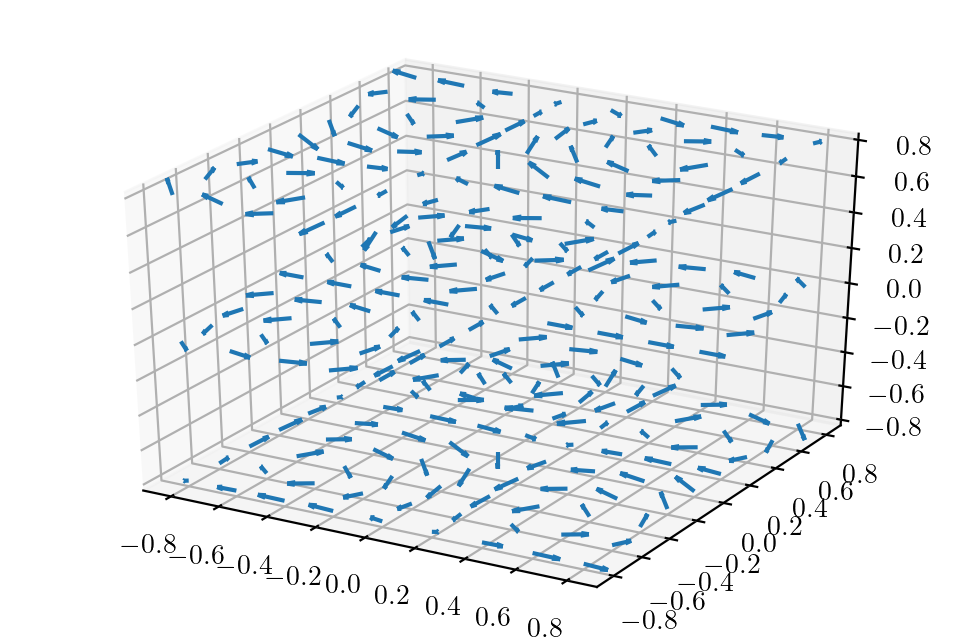

In [9]:

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()